In [115]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile as zf
import glob
import os
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, Normalizer, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,f1_score
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
import pickle

In [116]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [117]:
plt.style.use('seaborn-darkgrid')

In [118]:
path = r"C:\Users\Administrator\Documents\AIsat\Group_Project\datasets-20231023T003353Z-001.zip"

In [119]:
with zf.ZipFile(path, 'r') as myfile:
    myfile.extractall()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Administrator\\Documents\\AIsat\\Group_Project\\datasets-20231023T003353Z-001.zip'

In [6]:
filePaths = r"C:\Users\Administrator\Documents\AIsat\Group_Project\datasets"

In [7]:
files = []
for file in os.listdir(filePaths):
    filePath = os.path.join(filePaths, file)
    for file in glob.glob(os.path.join(filePath, '*csv')):
        files.append(file)
    for xlsFile in glob.glob(os.path.join(filePath, '*xlsx')):
        files.append(xlsFile)
    
    

In [8]:
files

['C:\\Users\\Administrator\\Documents\\AIsat\\Group_Project\\datasets\\Credit_Card_Churn_Prediction\\credit_card_churn.csv',
 'C:\\Users\\Administrator\\Documents\\AIsat\\Group_Project\\datasets\\Ecommerce_Customer_Churn_Analysis_Prediction\\E Commerce Dataset.xlsx',
 'C:\\Users\\Administrator\\Documents\\AIsat\\Group_Project\\datasets\\E_commerce_Churn_Dataset_Retail_Rocket\\retailrocket_customer_model.csv',
 'C:\\Users\\Administrator\\Documents\\AIsat\\Group_Project\\datasets\\E_commerce_Churn_Dataset_Retail_Rocket\\retailrocket_data_dictionary.csv']

In [9]:
df1 = pd.read_csv(files[0])
df1

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [10]:
df1.info(verbose= 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [11]:
df1.shape

(10127, 23)

In [12]:
# renaming the long columns
df1.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'NB_Classifier_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'NB_Classifier_2'}, 
          inplace=True)

In [13]:
#checking for missing values
df1.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
NB_Classifier_1             0
NB_Classifier_2             0
dtype: int64

In [14]:
df1['Card_Category'].value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

In [15]:
#checking for duplicate
df1.duplicated().sum()


0

In [16]:
print('Maximum Age', df1.Customer_Age.max())
print('Minimum Age', df1.Customer_Age.min())

Maximum Age 73
Minimum Age 26


In [17]:
bins = [20, 35, 50, 100]
labels = ['Young Adult', 'Adult', 'Senior']
df1['Age_Group'] = pd.cut(df1['Customer_Age'], bins= bins, labels= labels)


In [18]:
#mapping the categorical data
catgorical = df1.select_dtypes('object')
catgorical

Attrition_Flag Gender Education_Level Marital_Status  \
0      Existing Customer      M     High School        Married   
1      Existing Customer      F        Graduate         Single   
2      Existing Customer      M        Graduate        Married   
3      Existing Customer      F     High School        Unknown   
4      Existing Customer      M      Uneducated        Married   
...                  ...    ...             ...            ...   
10122  Existing Customer      M        Graduate         Single   
10123  Attrited Customer      M         Unknown       Divorced   
10124  Attrited Customer      F     High School        Married   
10125  Attrited Customer      M        Graduate        Unknown   
10126  Attrited Customer      F        Graduate        Married   

      Income_Category Card_Category  
0         $60K - $80K          Blue  
1      Less than $40K          Blue  
2        $80K - $120K          Blue  
3      Less than $40K          Blue  
4         $60K - $80K          Blue  
...               ...           ...  
10122     $40K - $60K          Blue  
10123     $40K - $60K          Blue  
10124  Less than $40K          Blue  
10125     $40K - $60K          Blue  
10126  Less than $40K        Silver  

[10127 rows x 6 columns]

In [19]:
def bar(df, column, figsize=[8,6]):
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=figsize)
    color = sb.color_palette()[0]
    base_order = df[column].value_counts().index
    bar = sb.countplot(data=df, x=column, color=color, order=base_order)
    plt.title(column + ' '+ 'Distribution')
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.xticks(rotation=20)

In [20]:
#checking for categorical columns
catgorical.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

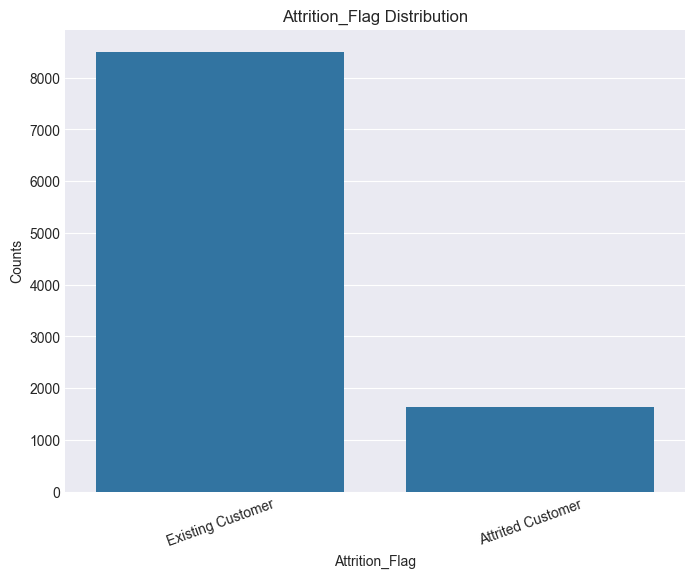

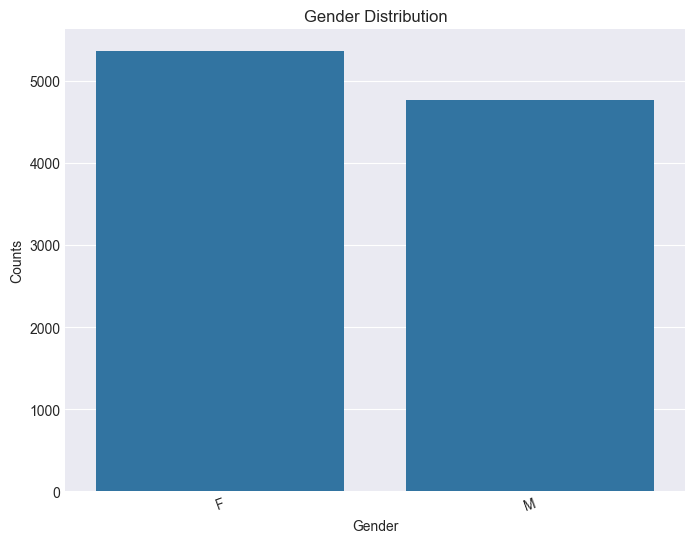

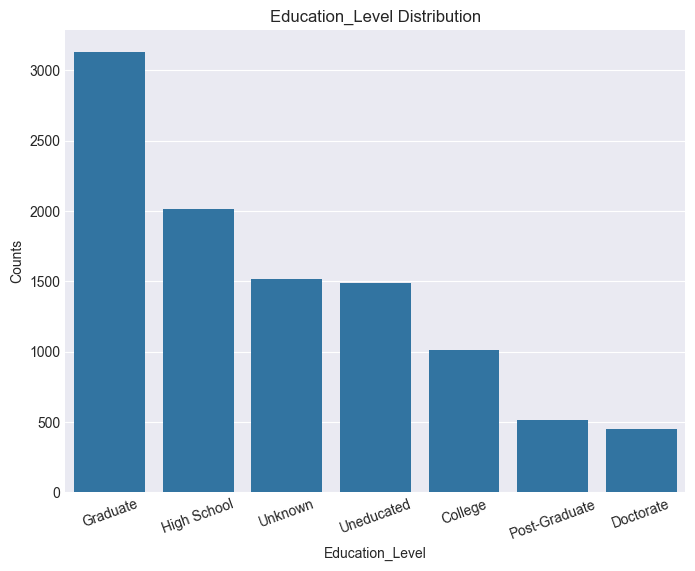

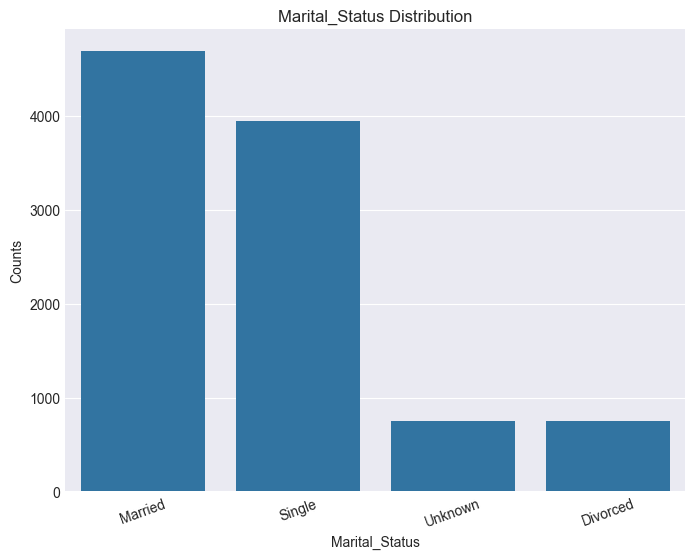

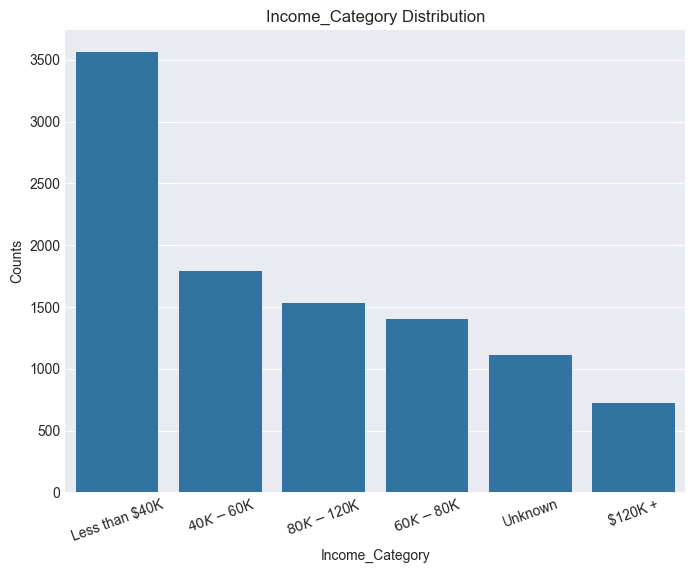

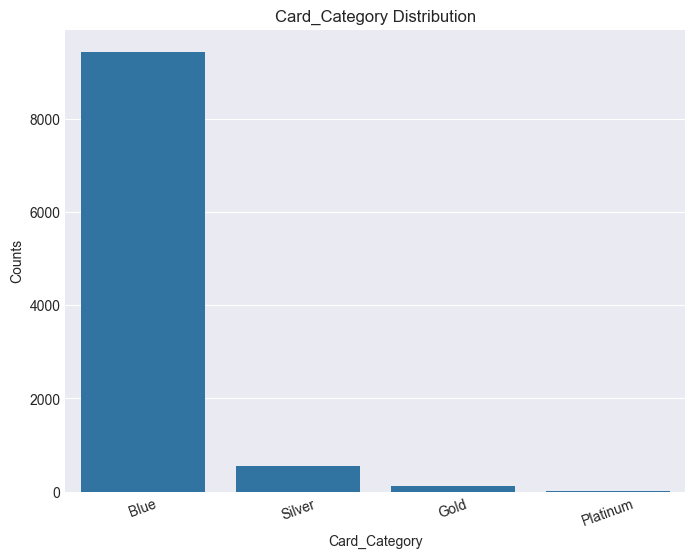

In [21]:
for cate in catgorical.columns:
    bar(df1, cate)

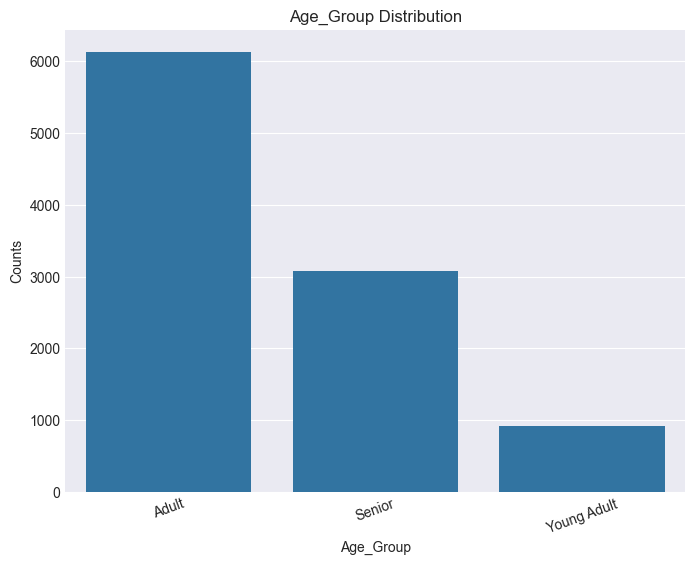

In [22]:
bar(df1, 'Age_Group')

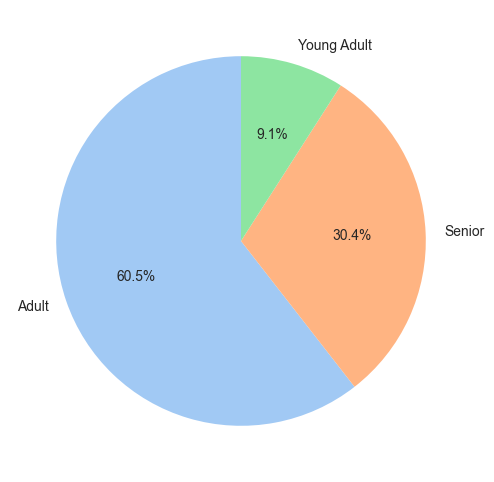

In [23]:
age_group_counts = df1['Age_Group'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90, colors=sb.color_palette('pastel'));

In [24]:
number = df1.select_dtypes('number')
number

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0      768805383            45                3              39   
1      818770008            49                5              44   
2      713982108            51                3              36   
3      769911858            40                4              34   
4      709106358            40                3              21   
...          ...           ...              ...             ...   
10122  772366833            50                2              40   
10123  710638233            41                2              25   
10124  716506083            44                1              36   
10125  717406983            30                2              36   
10126  714337233            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  NB_Classifier_1  \
0                    1.625                  0.061         0.000093   
1                    3.714                  0.105         0.000057   
2                    2.333                  0.000         0.000021   
3                    2.333                  0.760         0.000134   
4                    2.500                  0.000         0.000022   
...                    ...                    ...              ...   
10122                0.857                  0.462         0.000191   
10123                0.683                  0.511         0.995270   
10124                0.818                  0.000         0.997880   
10125          

In [25]:
number.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_Classifier_1', 'NB_Classifier_2'],
      dtype='object')

In [26]:
df1.describe().T

count          mean           std           min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  7.080821e+08   
Customer_Age              10127.0  4.632596e+01  8.016814e+00  2.600000e+01   
Dependent_count           10127.0  2.346203e+00  1.298908e+00  0.000000e+00   
Months_on_book            10127.0  3.592841e+01  7.986416e+00  1.300000e+01   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00  1.000000e+00   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00  0.000000e+00   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00  0.000000e+00   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03  1.438300e+03   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02  0.000000e+00   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03  3.000000e+00   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01  0.000000e+00   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03  5.100000e+02   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01  1.000000e+01   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01  0.000000e+00   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01  0.000000e+00   
NB_Classifier_1           10127.0  1.599975e-01  3.653010e-01  7.664200e-06   
NB_Classifier_2           10127.0  8.400026e-01  3.653010e-01  4.199800e-04   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   
NB_Classifier_1           9.898300e-05  1.814600e-04  3.373000e-04   
NB_Classifier_2           9.996600e-01  9.998200e-01  9.999000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01  
NB_Classifier_1           9.995800e-01  
NB_Classifier_2           9.999900e-01

<Figure size 2500x2000 with 0 Axes>

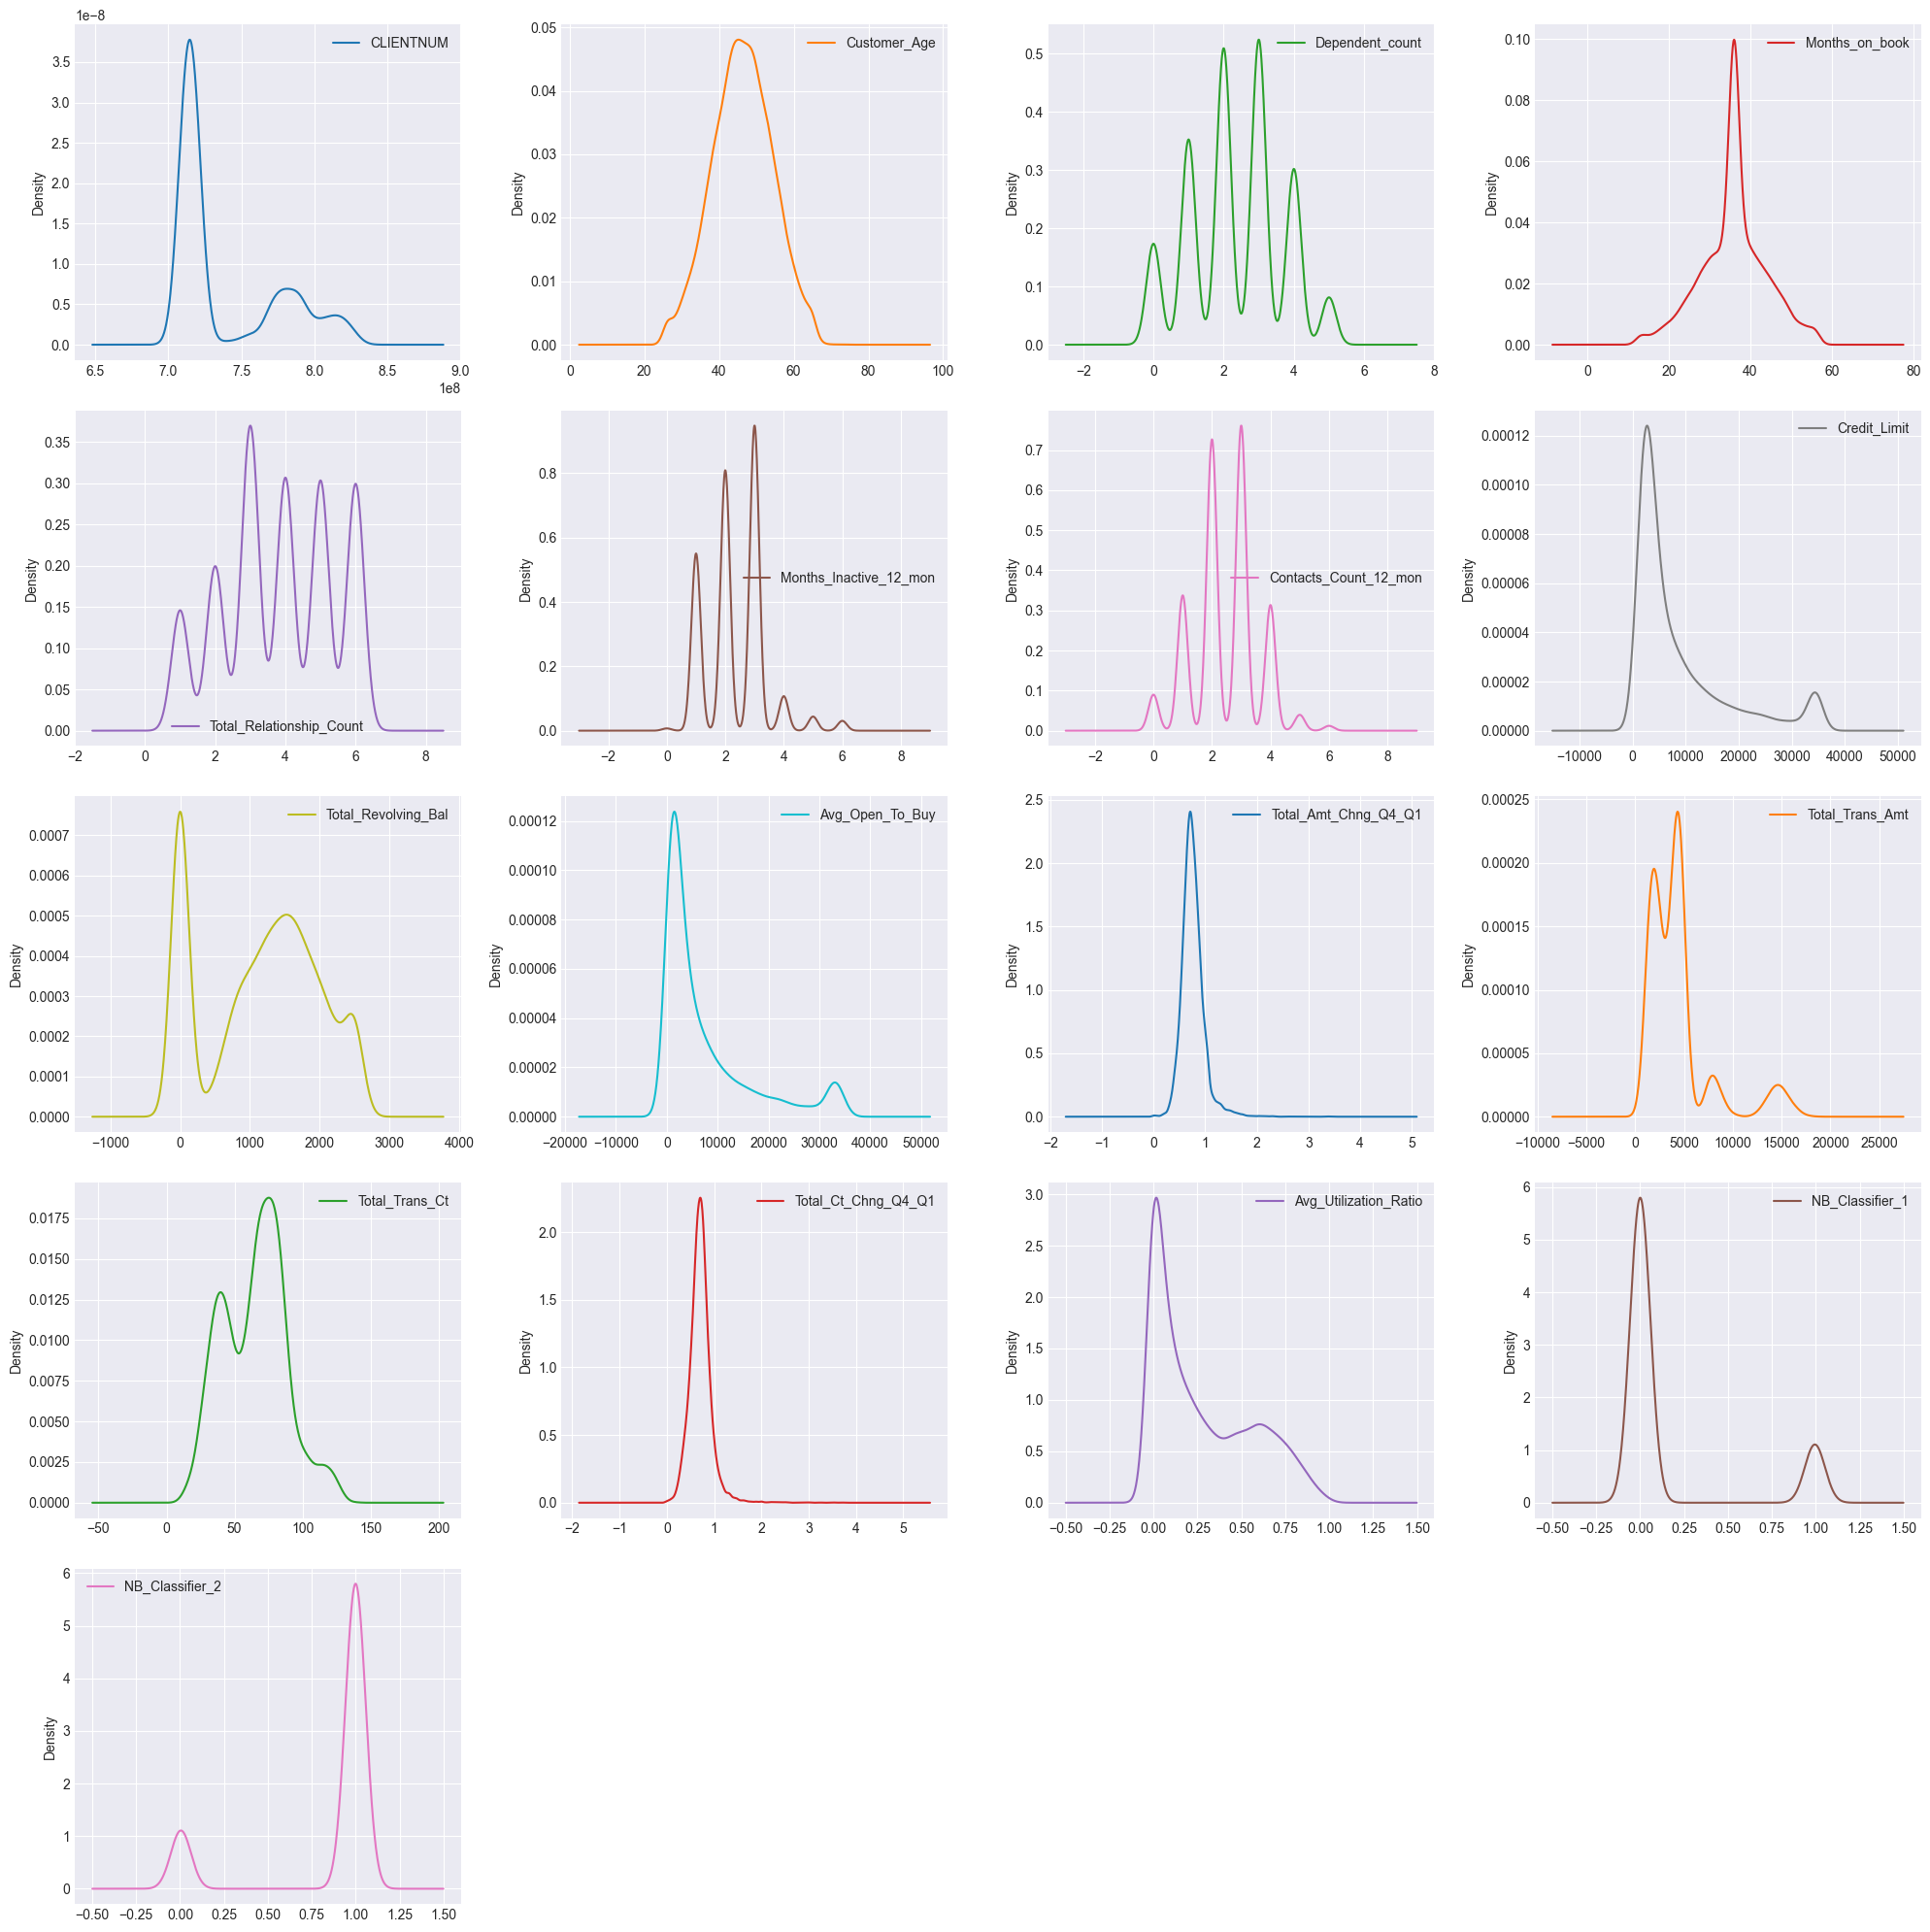

In [27]:
plt.figure(figsize=(25, 20), dpi= 100)
df1.plot(kind='density', subplots=True, layout=(5,4), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show();

<Figure size 1500x1200 with 0 Axes>

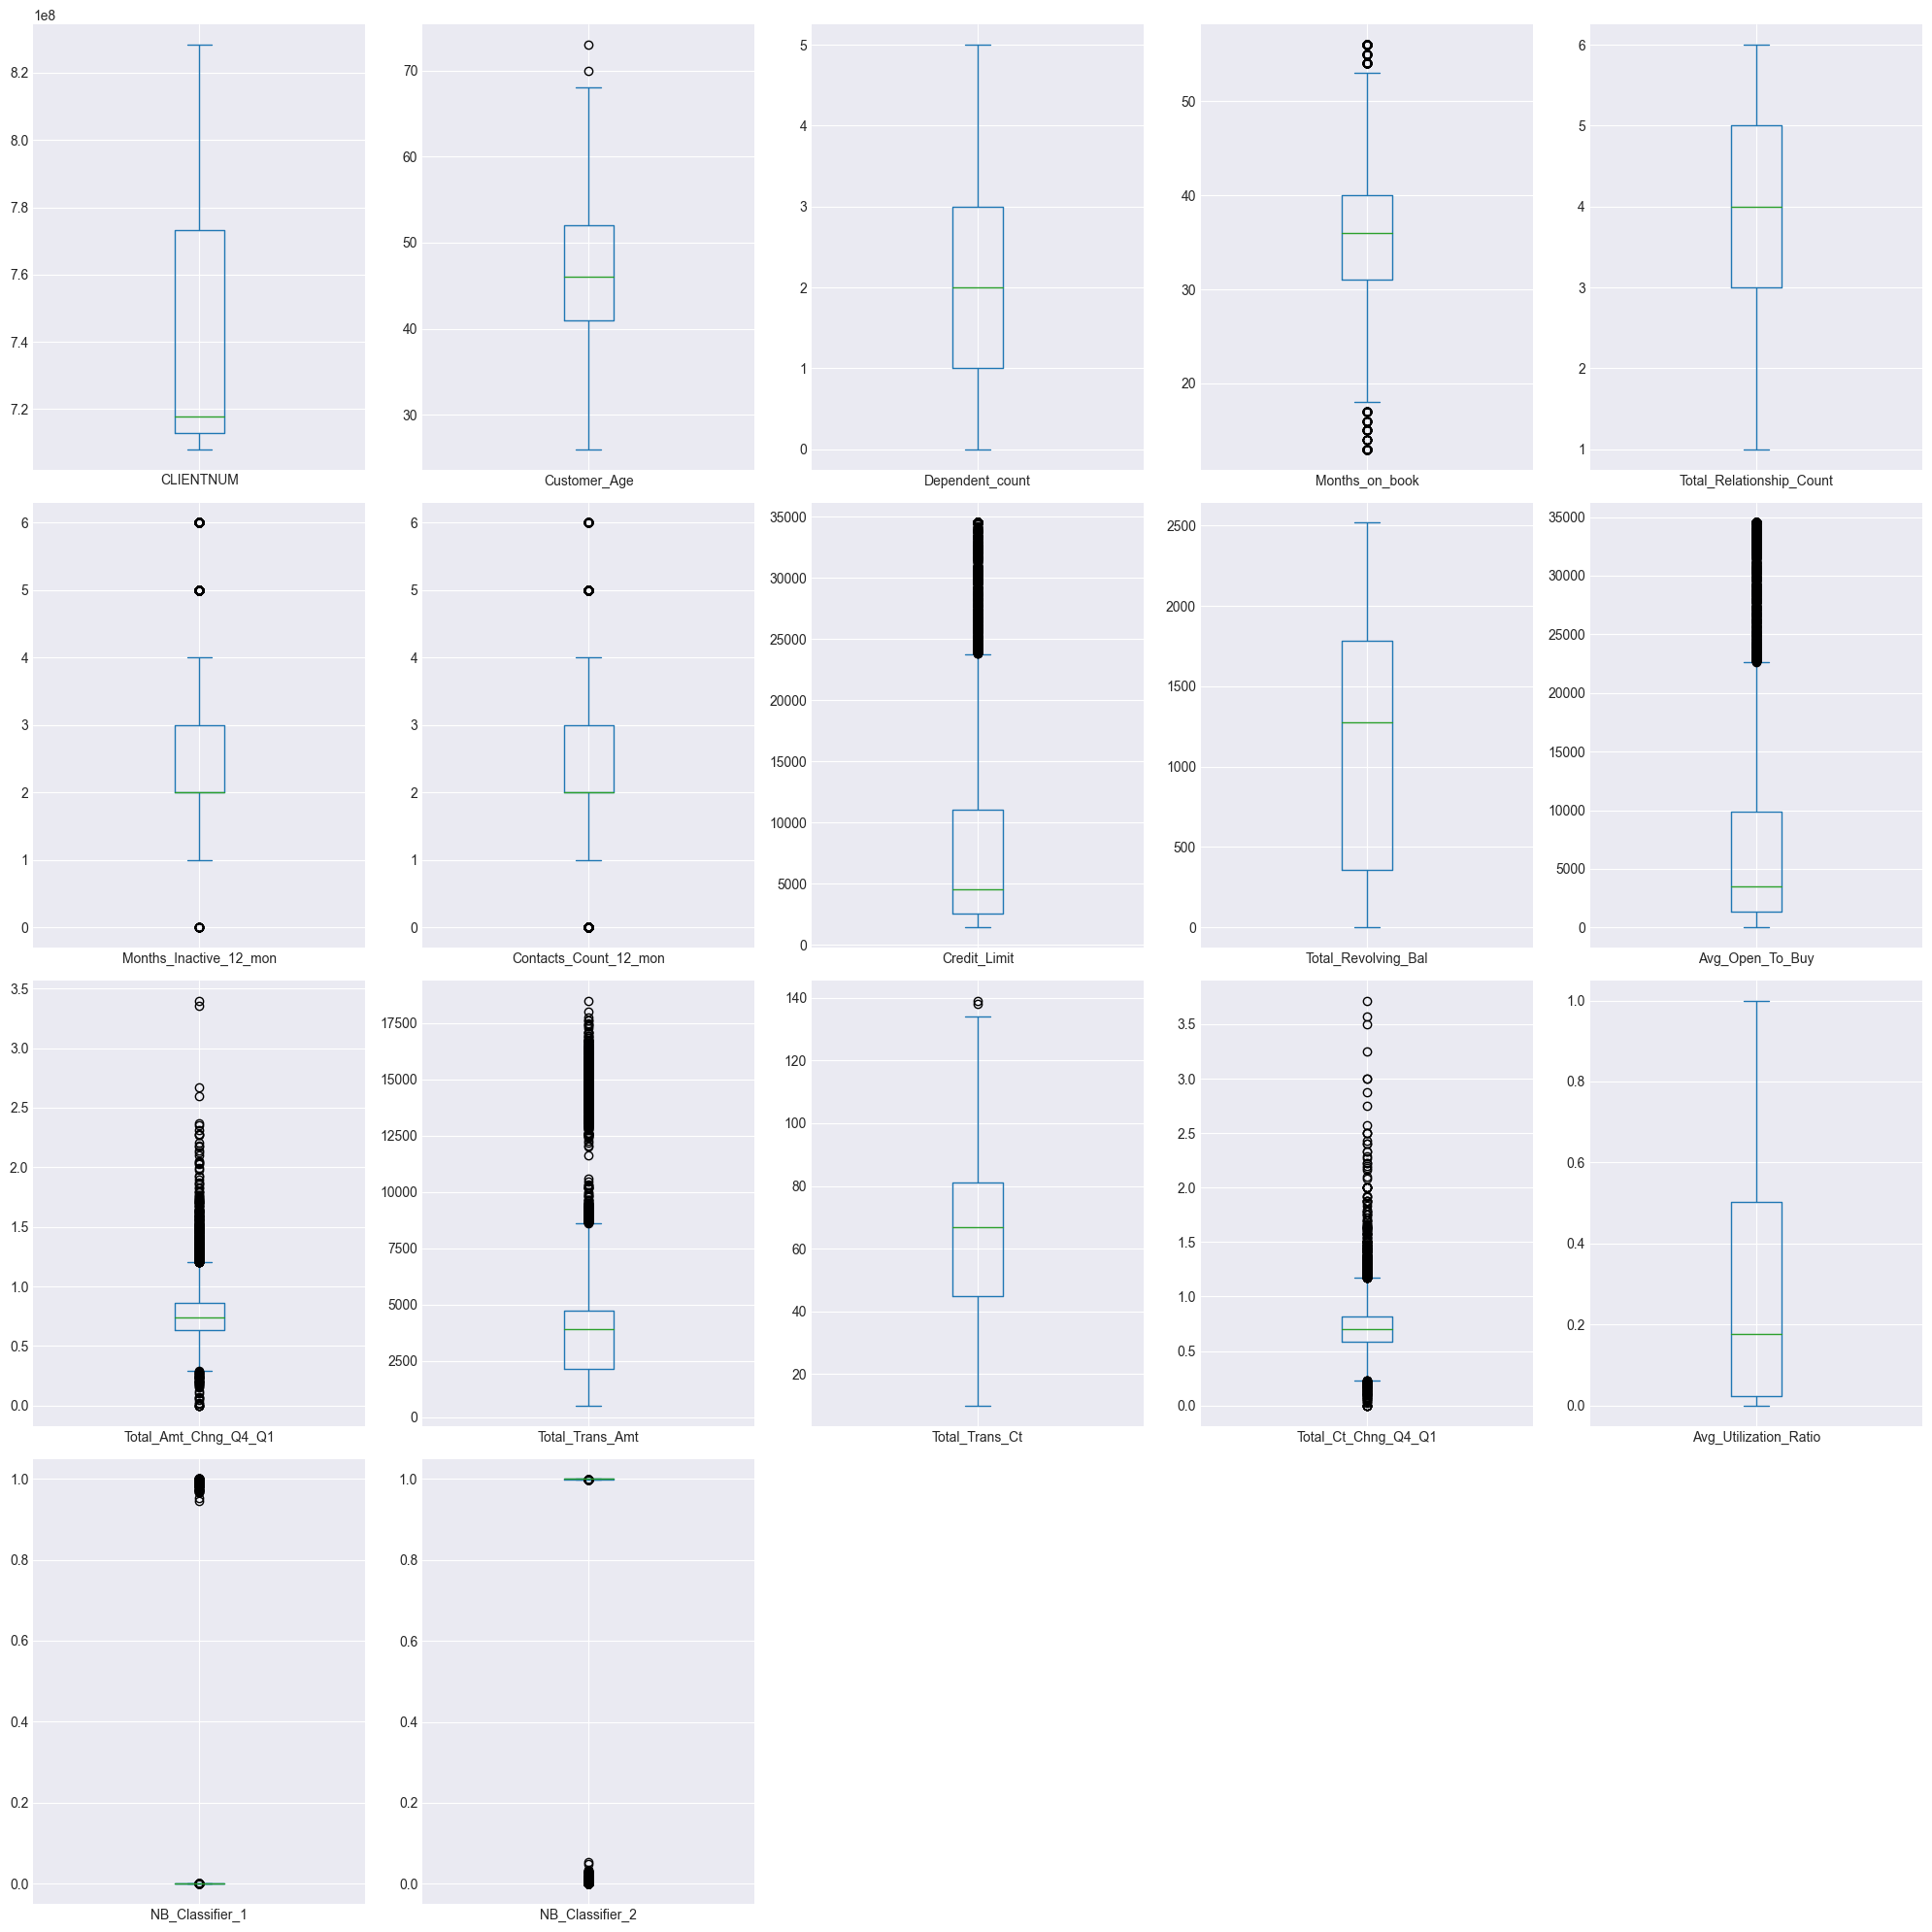

In [28]:
plt.figure(figsize=(25, 20), dpi=60)
df1.plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Customer Age')

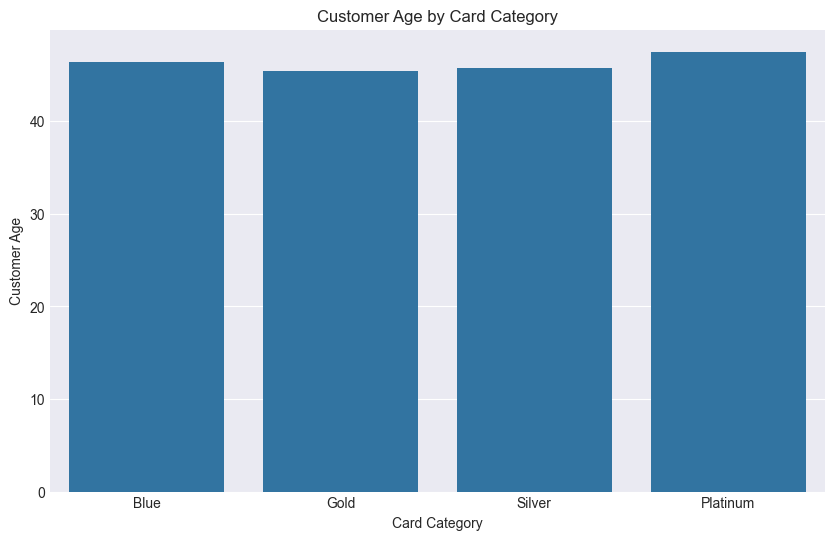

In [29]:
color = sb.color_palette()[0]
plt.figure(figsize= [10,6])
sb.barplot(data= df1, x = 'Card_Category', y= 'Customer_Age', errorbar= None, color= color);
plt.title('Customer Age by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Customer Age')

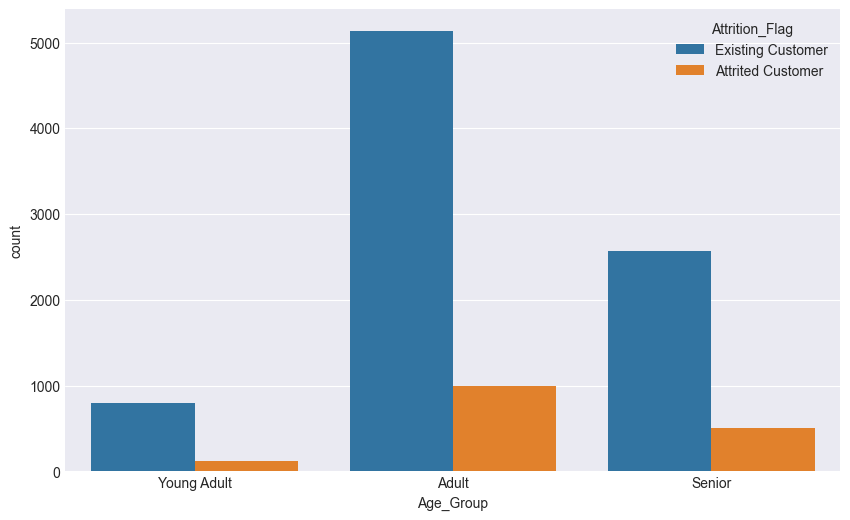

In [30]:
color = sb.color_palette()[0]
plt.figure(figsize= [10,6])
sb.countplot(data= df1, x= 'Age_Group', hue= 'Attrition_Flag');

<Axes: xlabel='Education_Level', ylabel='count'>

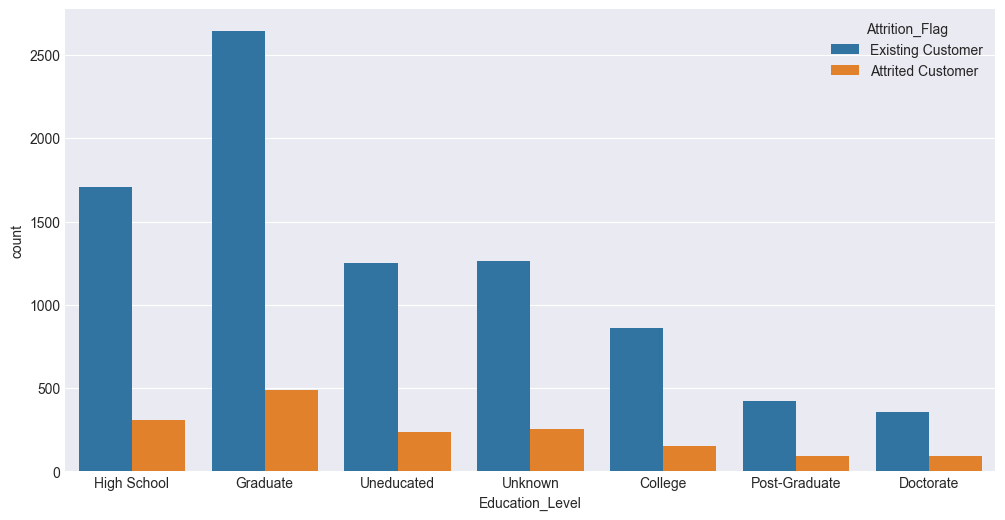

In [31]:

plt.figure(figsize= [12,6])
sb.countplot(data= df1, x= 'Education_Level', hue= 'Attrition_Flag')

<Axes: xlabel='Gender', ylabel='count'>

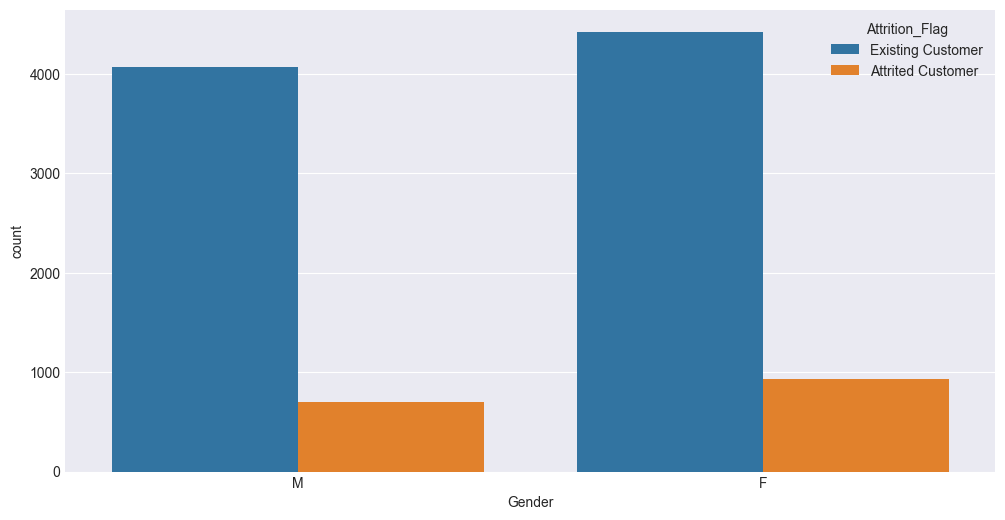

In [32]:
plt.figure(figsize= [12,6])
sb.countplot(data= df1, x= 'Gender', hue= 'Attrition_Flag')

In [33]:
df1.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_Classifier_1', 'NB_Classifier_2', 'Age_Group'],
      dtype='object')

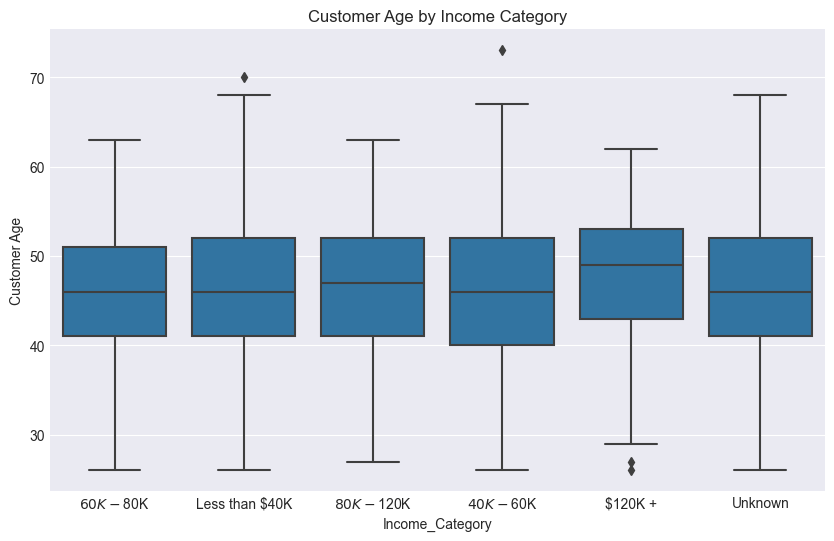

In [34]:
color = sb.color_palette()[0]
plt.figure(figsize= [10,6])
sb.boxplot(data= df1, x = 'Income_Category', y= 'Customer_Age', color= color);
plt.title('Customer Age by Income Category')
plt.xlabel('Income_Category')
plt.ylabel('Customer Age');

## Financial Information

<Axes: >

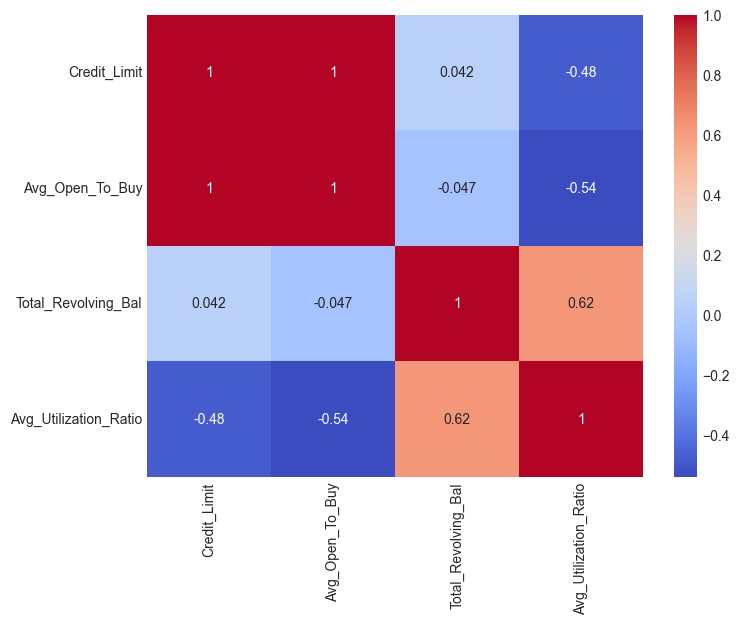

In [35]:
plt.figure(figsize=(8, 6))
sb.heatmap(df1[['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio']].corr(),
           annot= True, cmap= 'coolwarm')

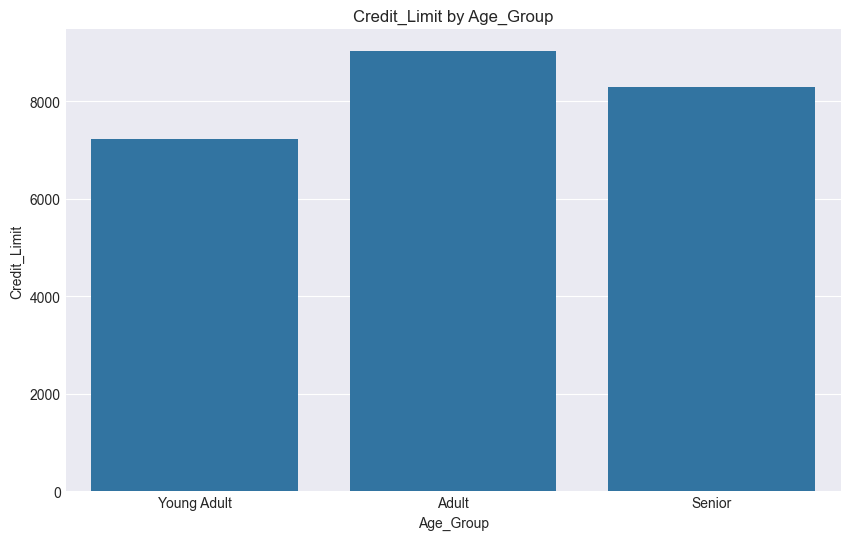

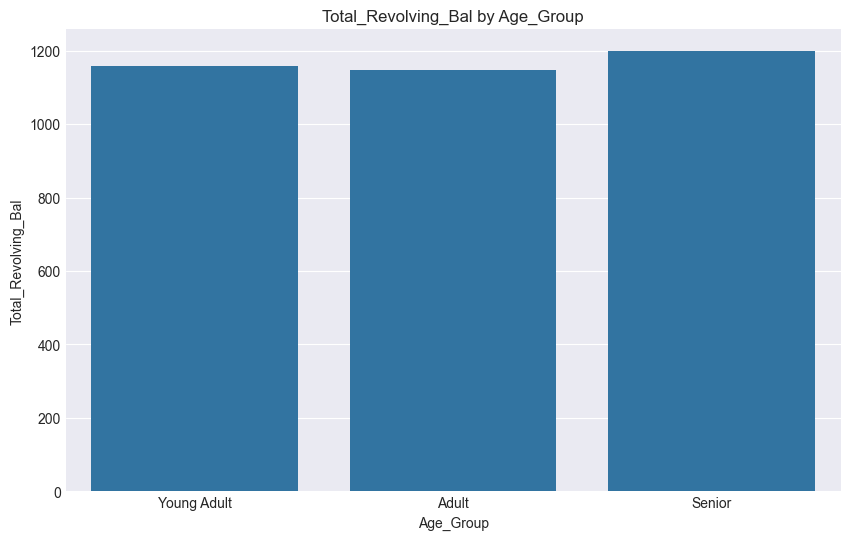

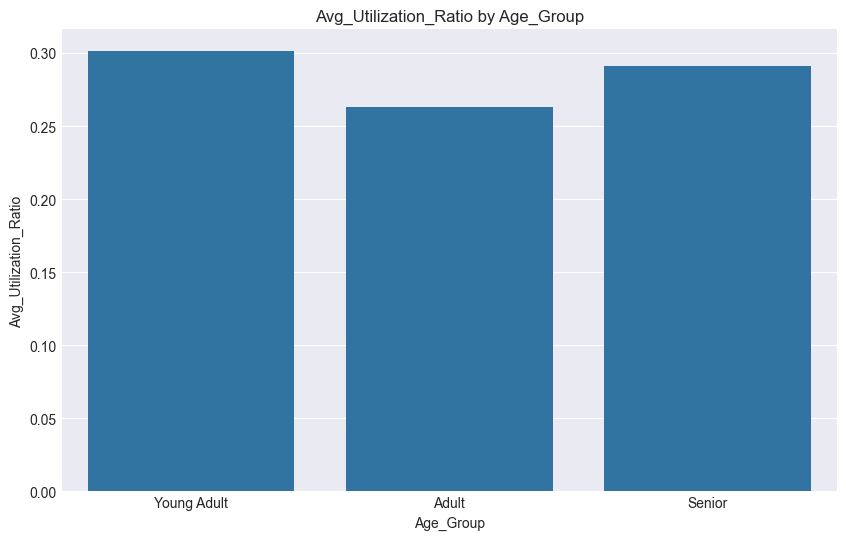

In [36]:
financialColumns = ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio']
def finbar(df, x, y ):
    color = sb.color_palette()[0]
    plt.figure(figsize= [10,6])
    sb.barplot(data= df1, x = x, y= y, color= color, errorbar= None);
    plt.title(f'{y} by {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    
for i in financialColumns:
    finbar(df1, 'Age_Group', i)

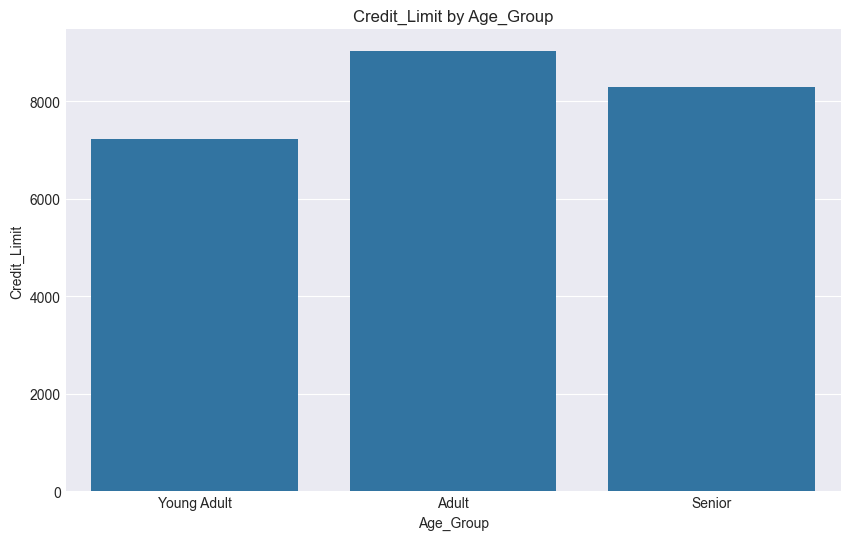

In [37]:
finbar(df1, 'Age_Group', 'Credit_Limit')

## Transaction and Engagement

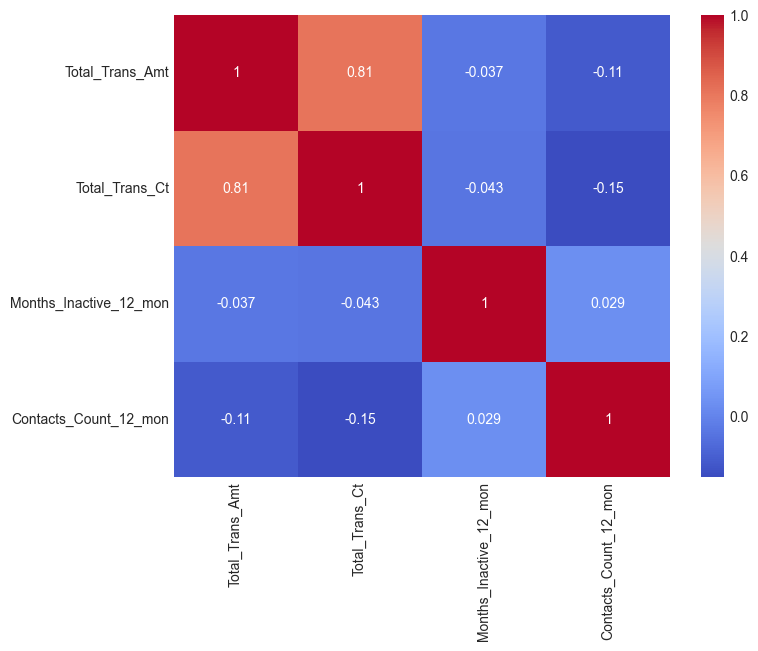

In [38]:
plt.figure(figsize=(8, 6))
sb.heatmap(df1[['Total_Trans_Amt', 'Total_Trans_Ct', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']].corr(),
           annot= True, cmap= 'coolwarm');

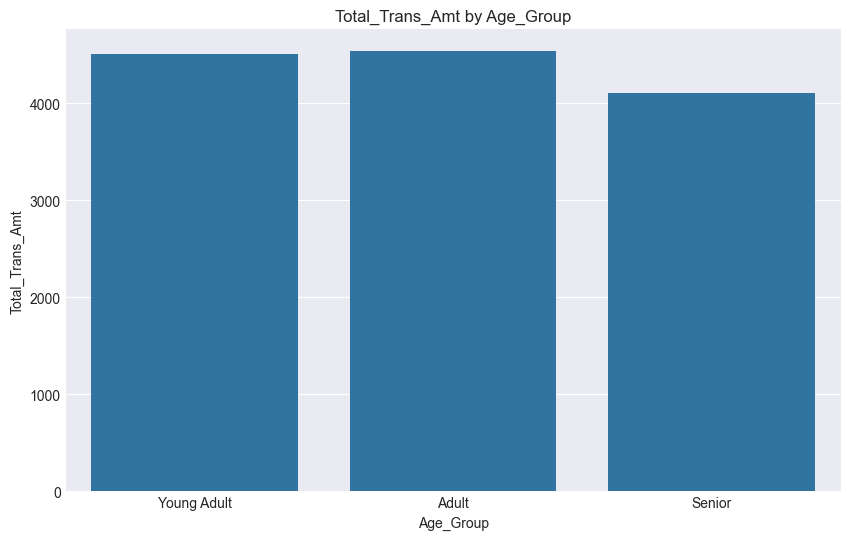

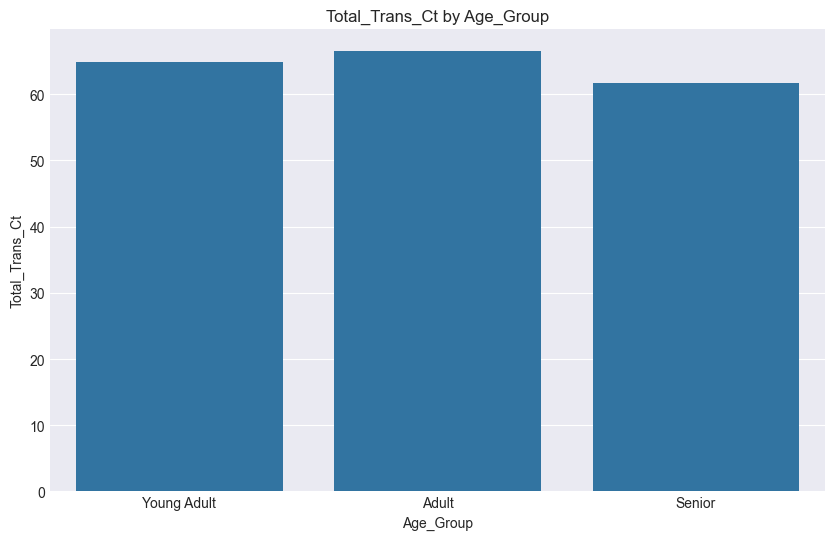

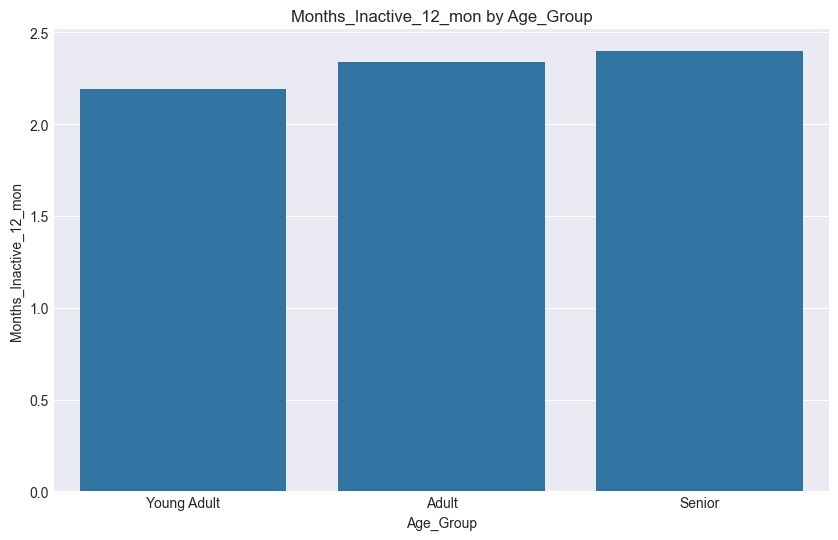

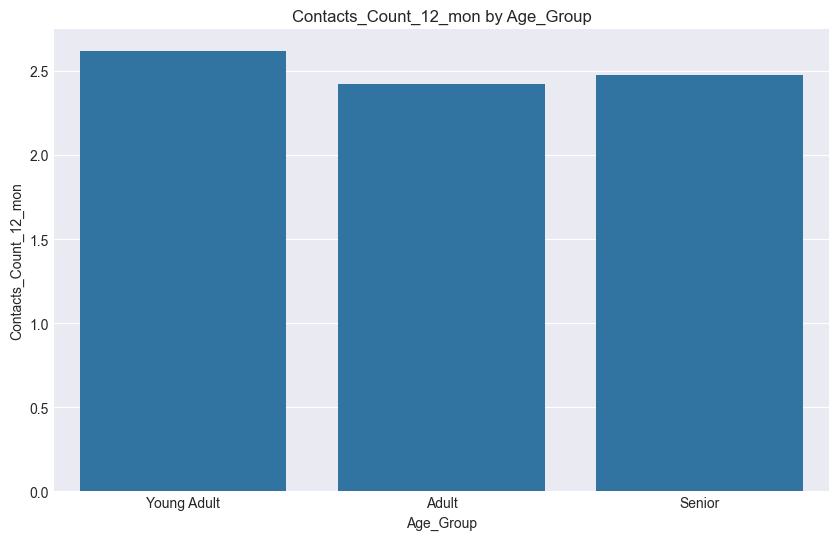

In [39]:
transEngColumns = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
def finbar(df, x, y ):
    color = sb.color_palette()[0]
    plt.figure(figsize= [10,6])
    sb.barplot(data= df1, x = x, y= y, color= color, errorbar= None);
    plt.title(f'{y} by {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    
for i in transEngColumns:
    finbar(df1, 'Age_Group', i)

## Customer Demographics

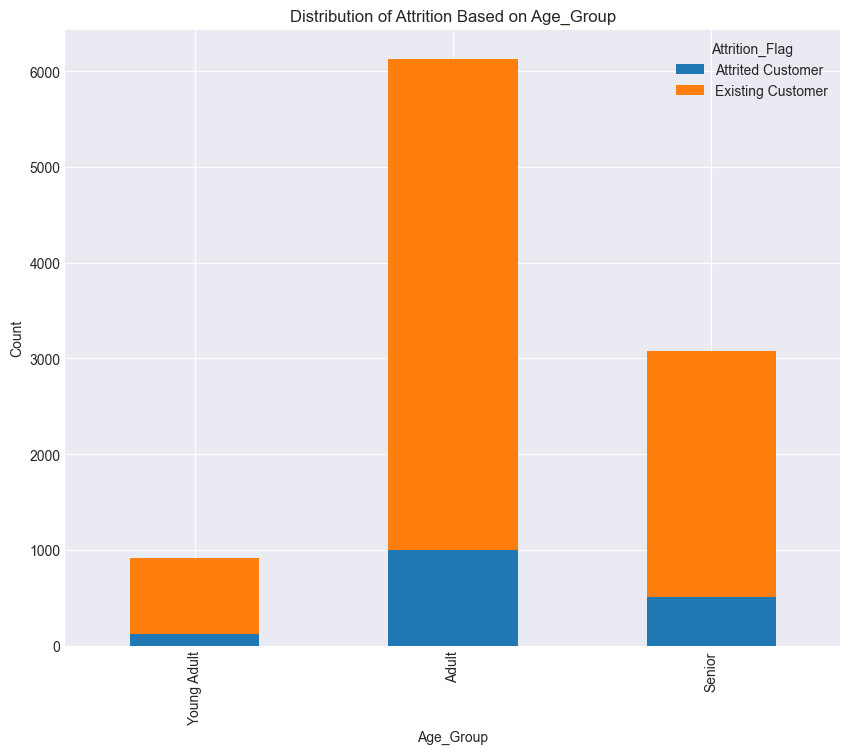

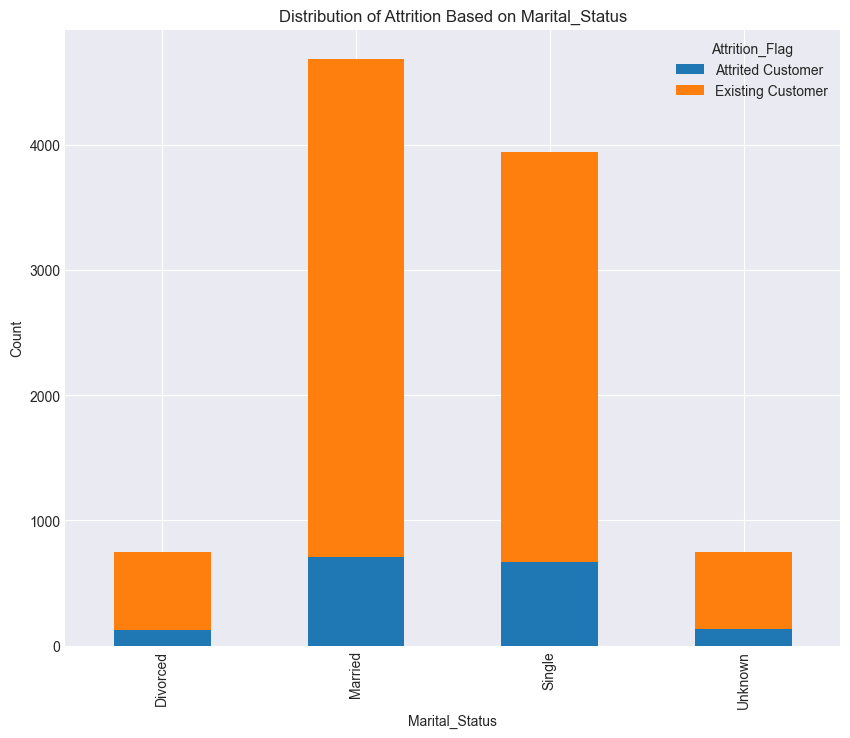

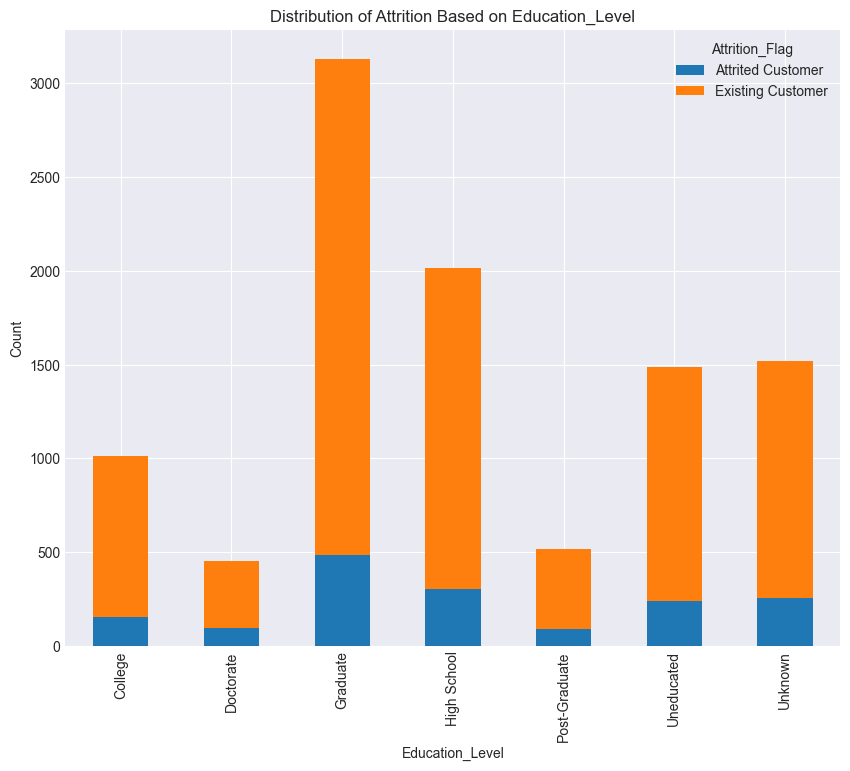

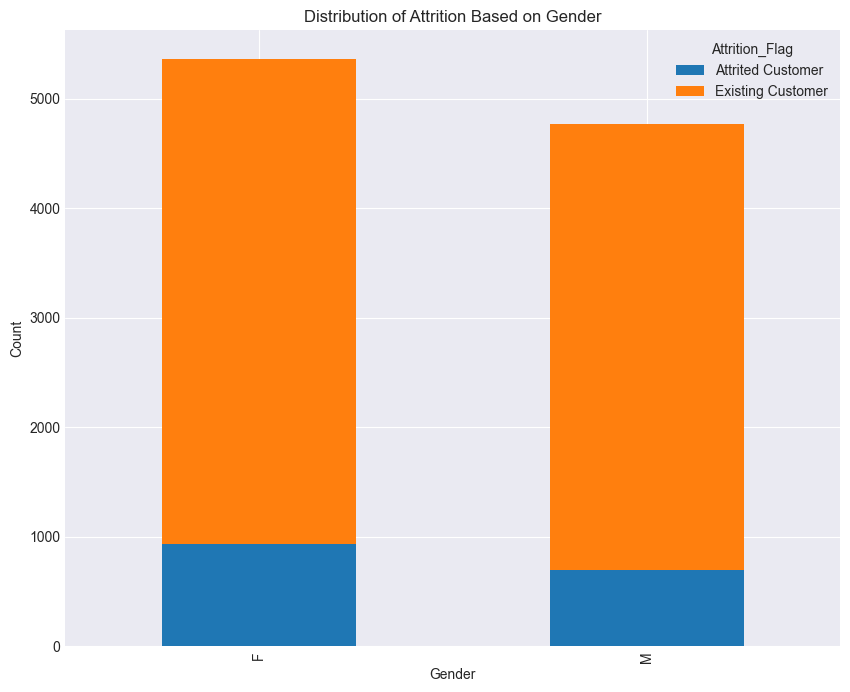

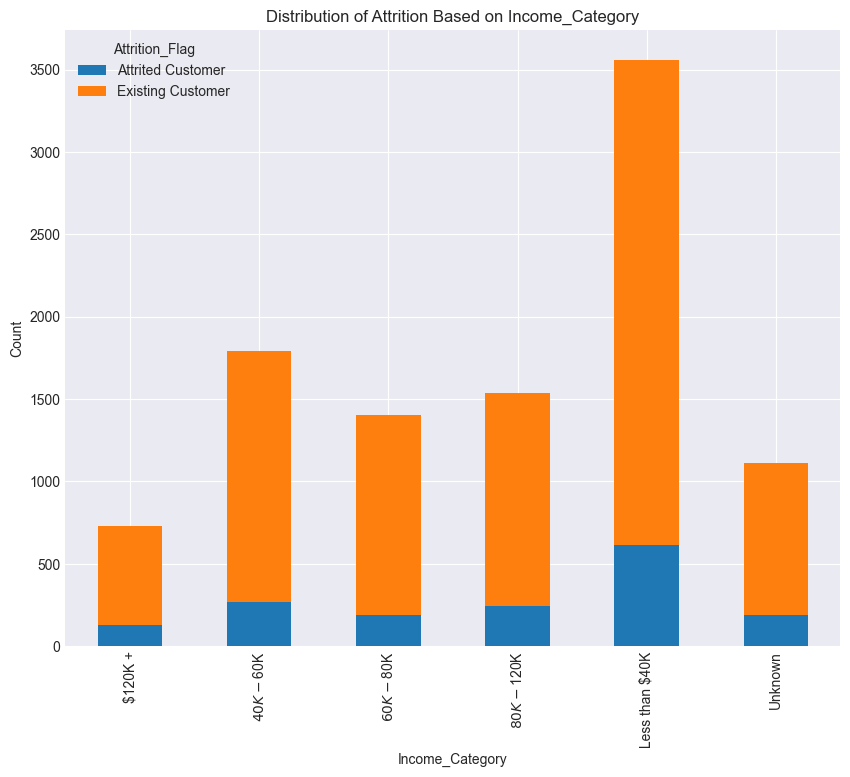

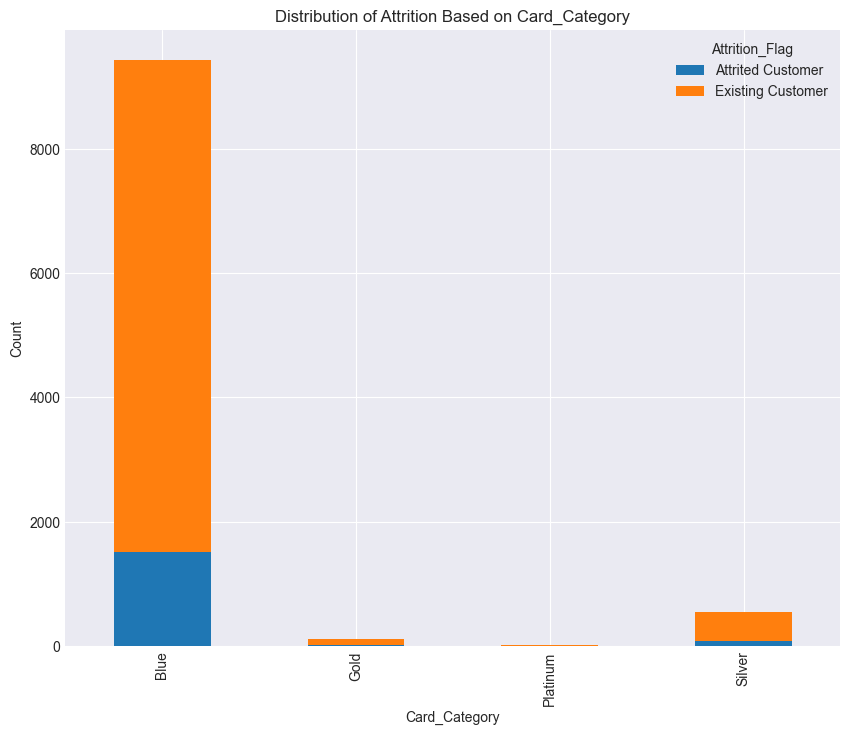

In [40]:
demoColumns = ['Age_Group', 'Marital_Status', 'Education_Level', 'Gender', 'Income_Category', 'Card_Category' ]
def churn(column):
        finChurn = df1.groupby([column, 'Attrition_Flag']).size().unstack()
        return finChurn.plot(kind='bar', stacked=True, figsize=(10,8), 
                             title = 'Distribution of Attrition Based on' + ' ' + i, xlabel = column, ylabel = 'Count')
for i in demoColumns:
    churn(i)  

In [41]:
df1['Months_on_book'].max()

56

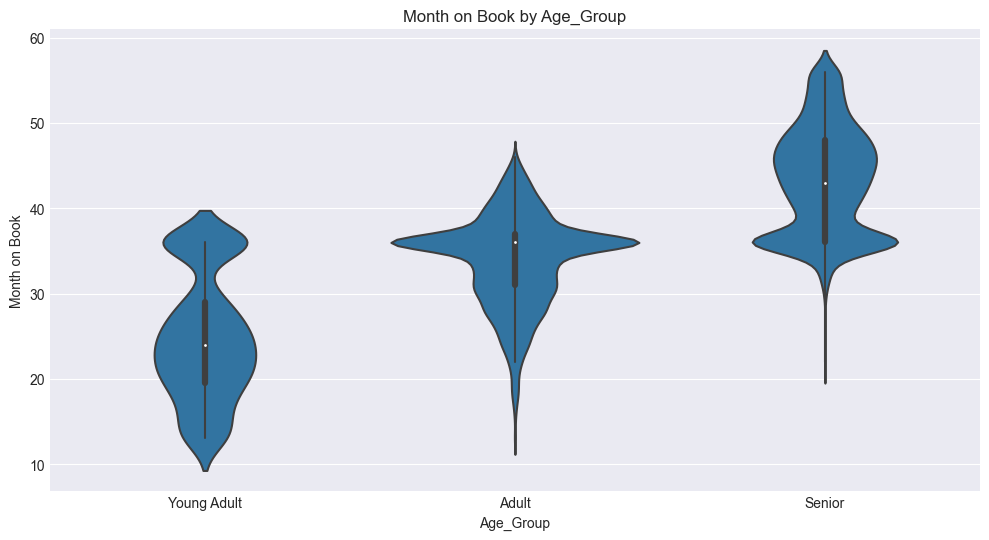

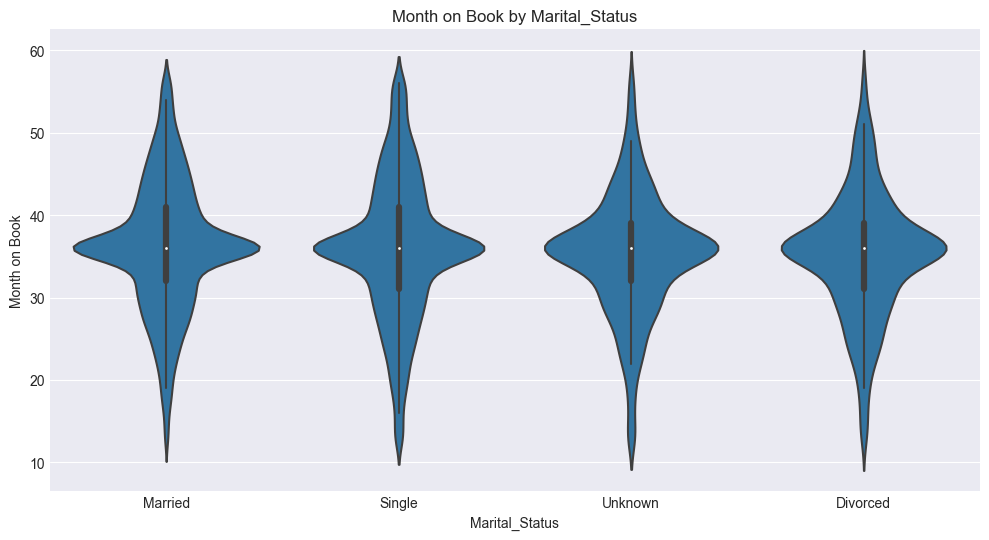

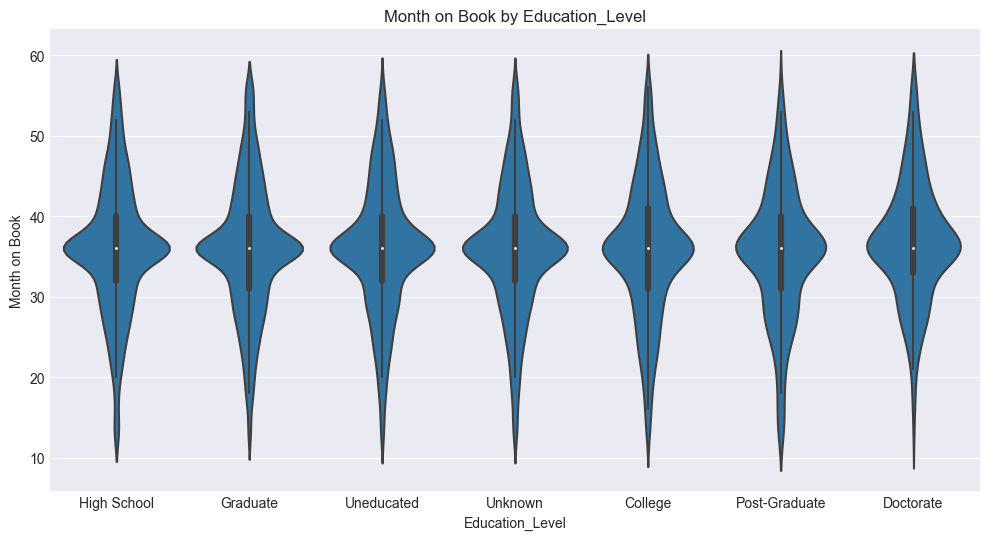

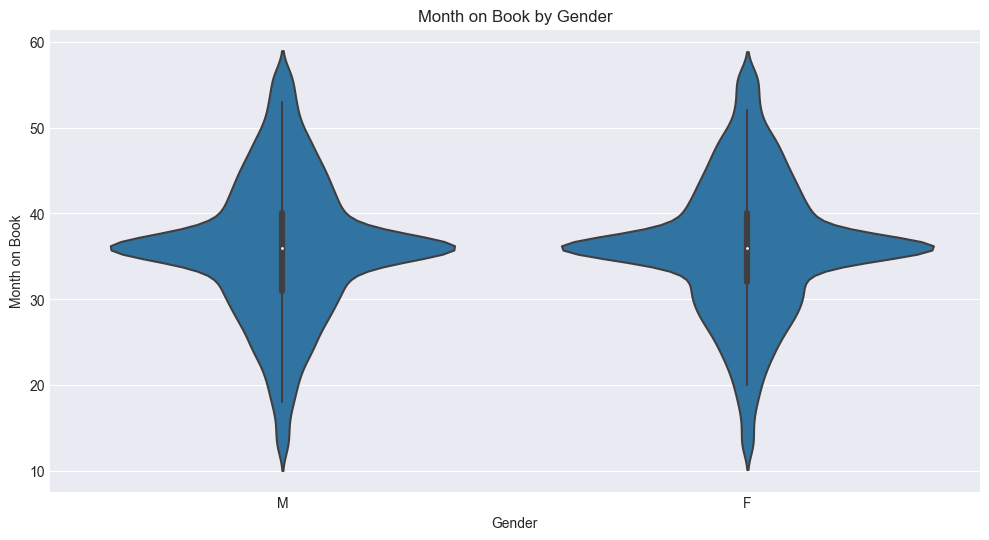

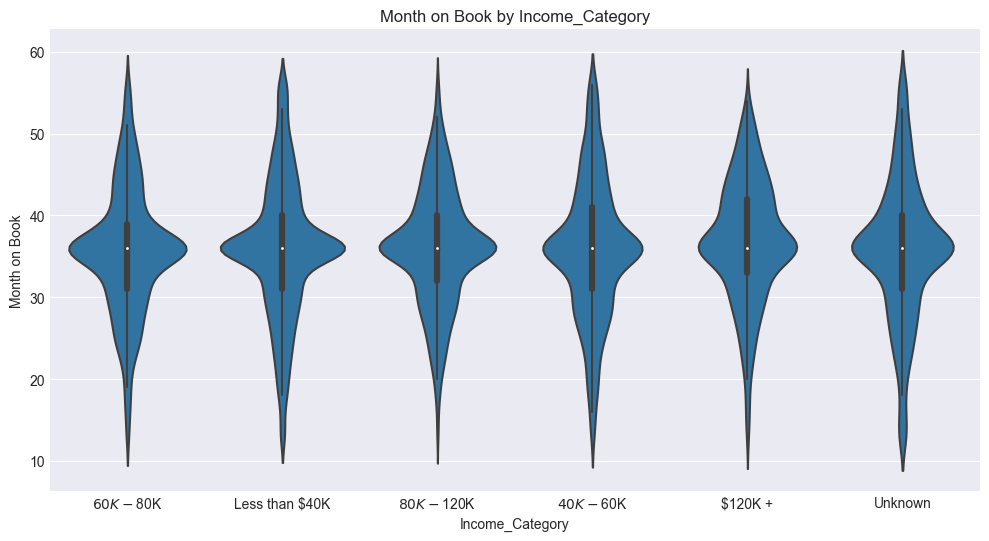

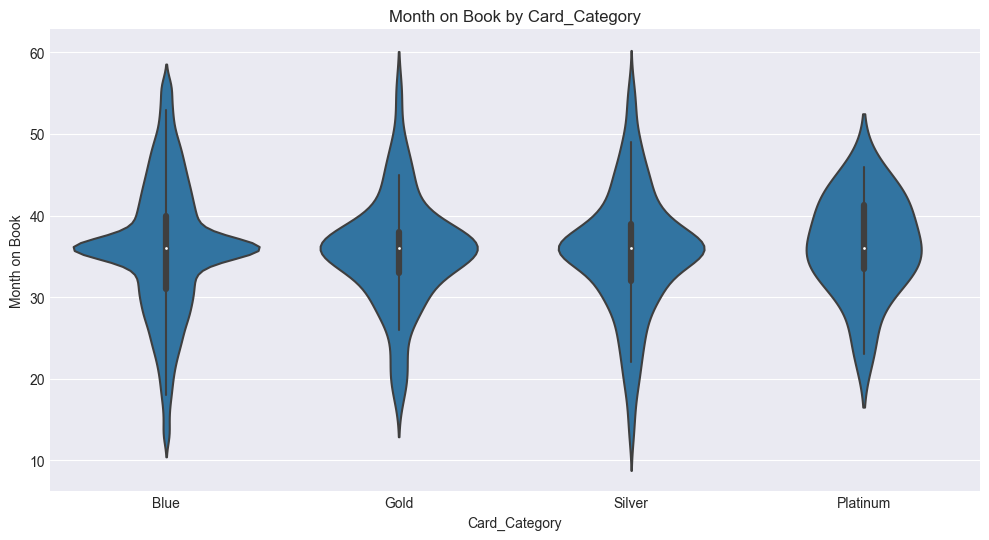

In [42]:
def violine(df, x):
    plt.figure(figsize= [12,6])
    color = sb.color_palette()[0]
    sb.violinplot(data= df1, y= 'Months_on_book', x= x, color= color)
    plt.title(f'Month on Book by {x}')
    plt.xlabel(x)
    plt.ylabel('Month on Book')
    
for i in demoColumns:
    violine(df1, i)  

<Figure size 2500x2000 with 0 Axes>

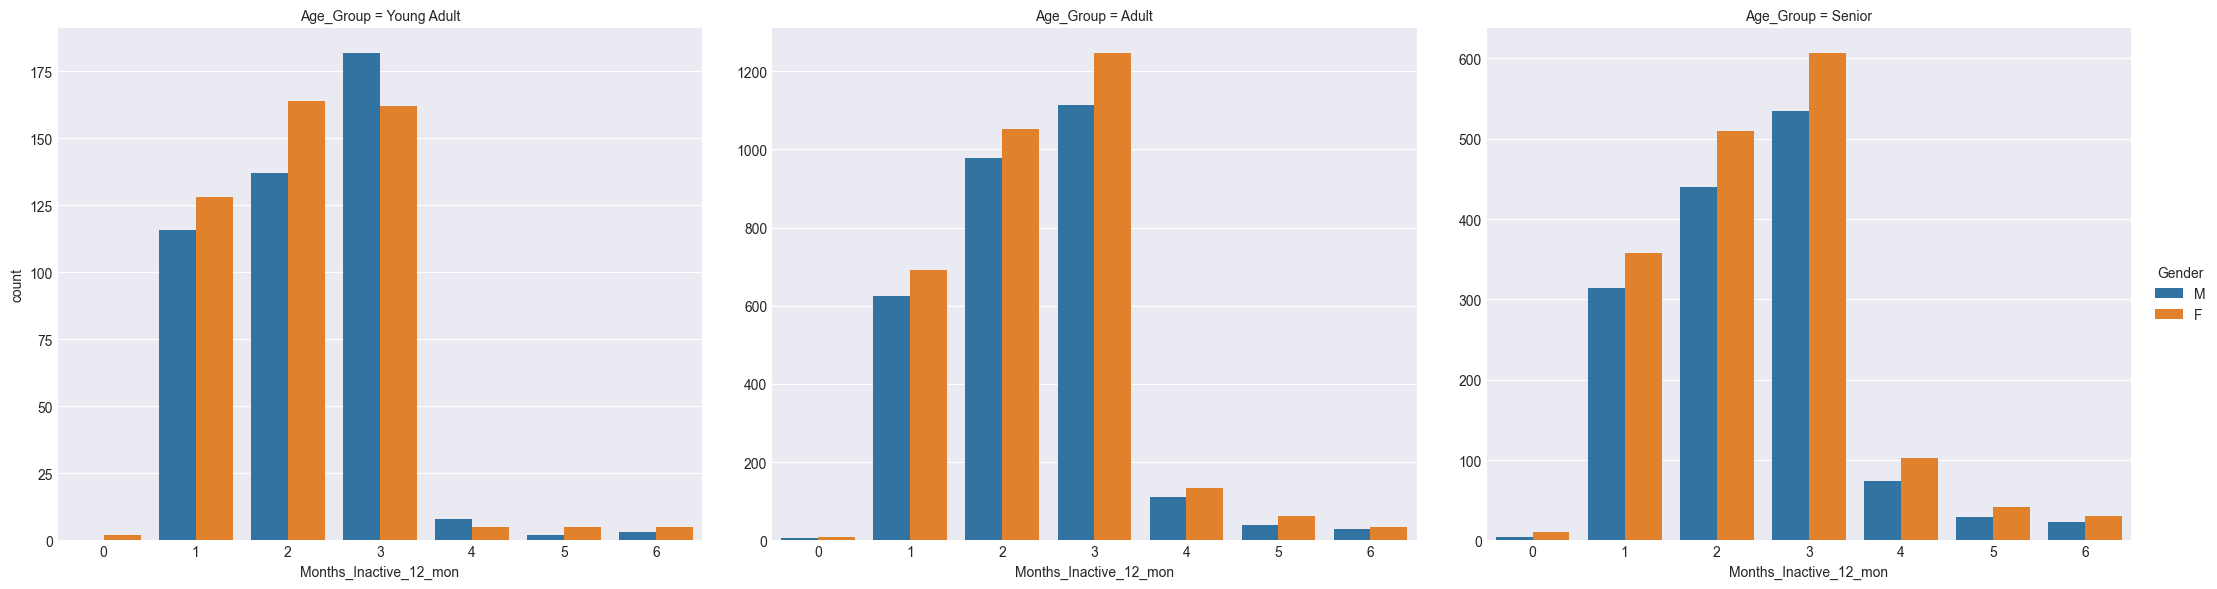

In [43]:
plt.figure(figsize=[25, 20], dpi= 100)
sb.catplot(x='Months_Inactive_12_mon', hue='Gender', col='Age_Group', kind='count', data=df1, col_wrap=3, height=6,
           aspect=1.2, sharey=False, sharex= False);
#plt.suptitle('Count of Months Inactive by Age Group and Gender', fontsize=18)
plt.show();

<Figure size 2500x2000 with 0 Axes>

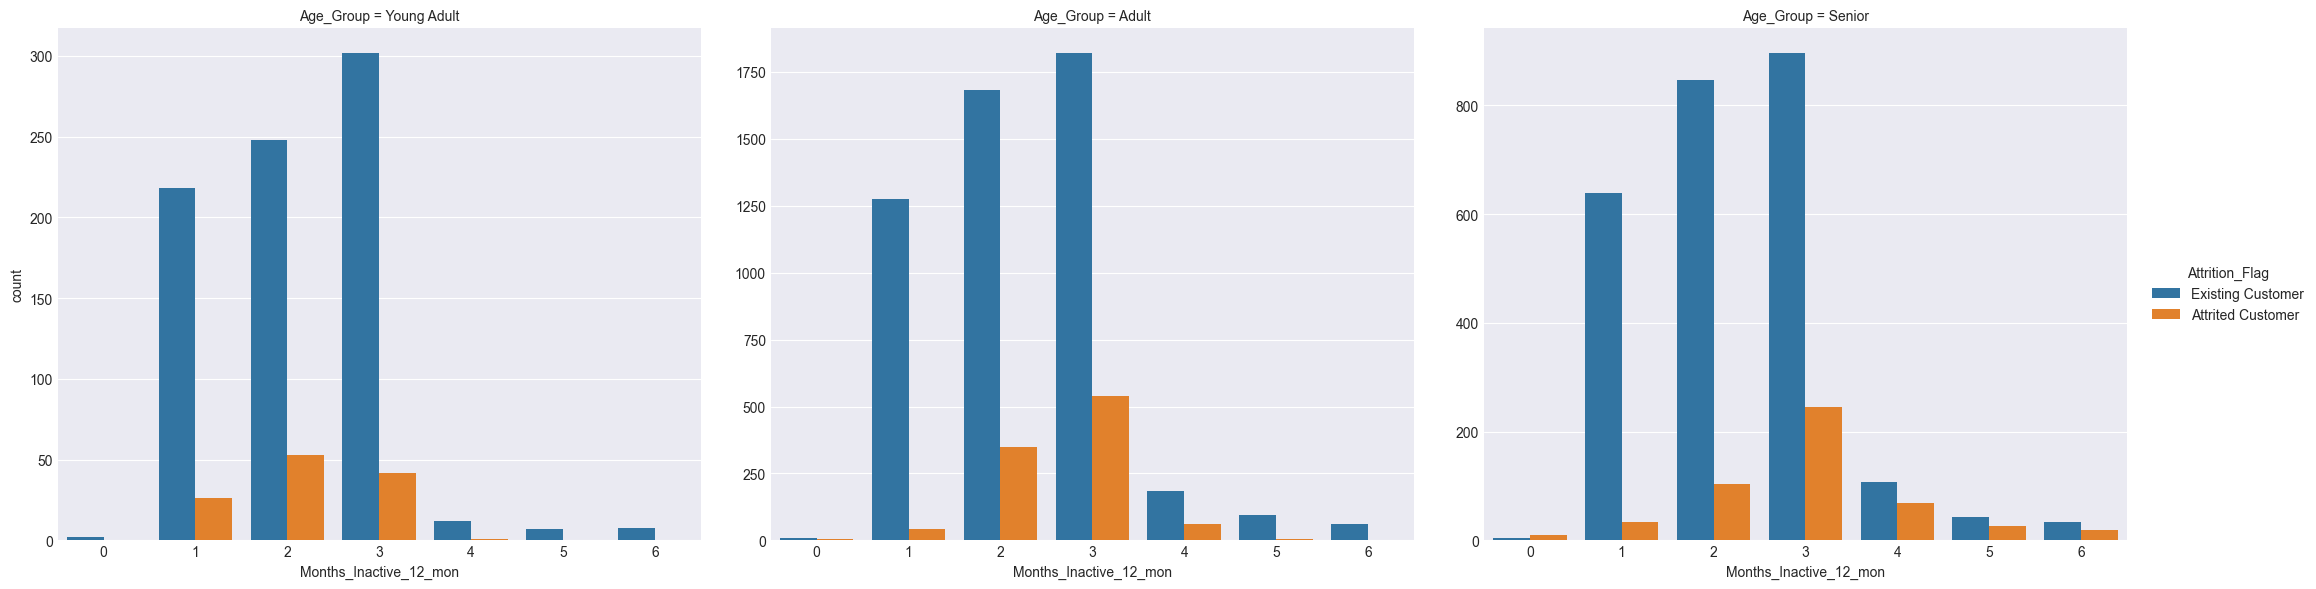

In [44]:
plt.figure(figsize=[25, 20], dpi= 100)
sb.catplot(x='Months_Inactive_12_mon', hue='Attrition_Flag', col='Age_Group', kind='count', data=df1, col_wrap=3, height=6,
           aspect=1.2, sharey=False, sharex= False);

In [45]:
number.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_Classifier_1', 'NB_Classifier_2'],
      dtype='object')

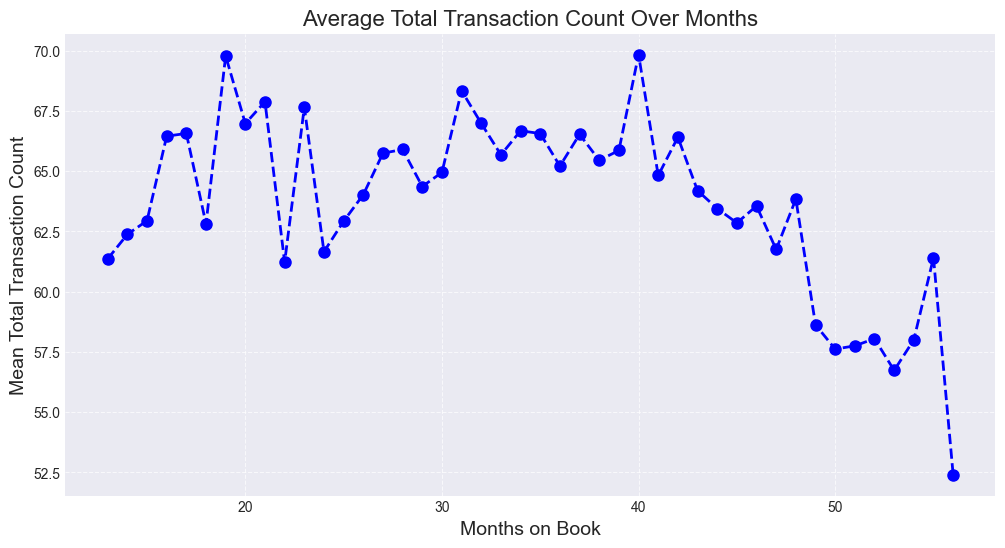

In [46]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize= [12,6])
df1.groupby(df1['Months_on_book'])['Total_Trans_Ct'].mean().plot(kind = 'line', color='blue',
                                    marker='o', linestyle='--', linewidth=2, markersize=8)
plt.title('Average Total Transaction Count Over Months', fontsize=16)
plt.xlabel('Months on Book', fontsize=14)
plt.ylabel('Mean Total Transaction Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

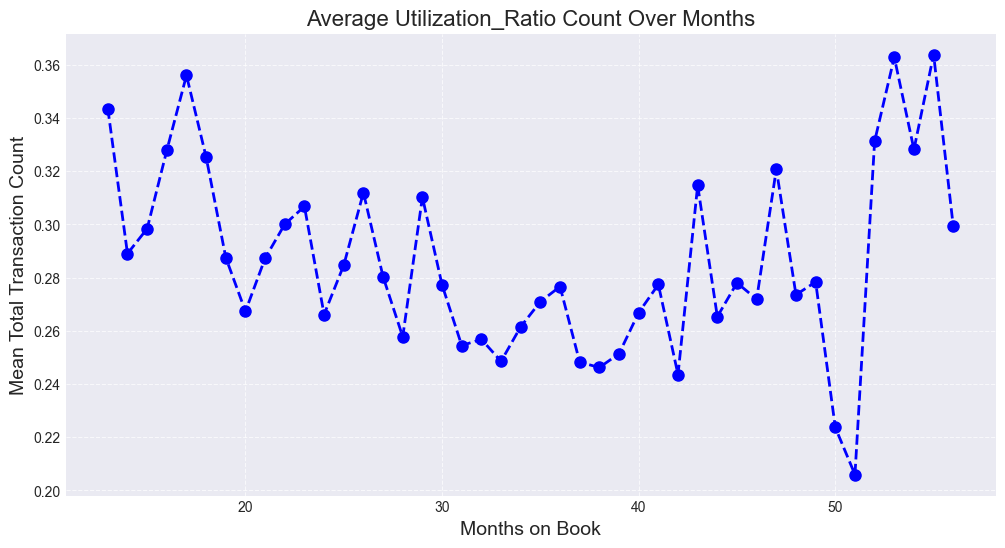

In [47]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize= [12,6])
df1.groupby(df1['Months_on_book'])['Avg_Utilization_Ratio'].mean().plot(kind = 'line', color='blue',
                                    marker='o', linestyle='--', linewidth=2, markersize=8)
plt.title('Average Utilization_Ratio Count Over Months', fontsize=16)
plt.xlabel('Months on Book', fontsize=14)
plt.ylabel('Mean Total Transaction Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

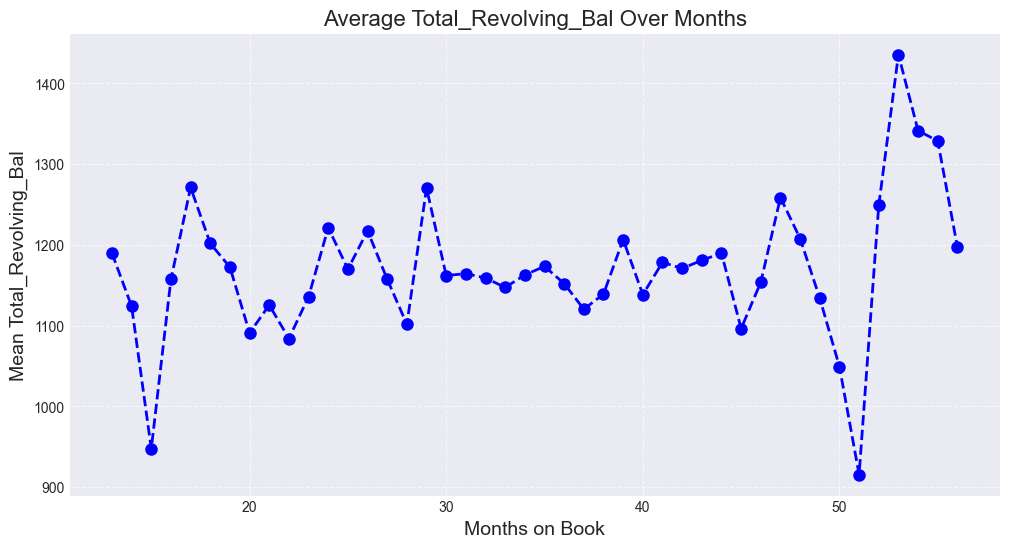

In [48]:
plt.figure(figsize= [12,6])
df1.groupby(df1['Months_on_book'])['Total_Revolving_Bal'].mean().plot(kind = 'line', color='blue',
                                    marker='o', linestyle='--', linewidth=2, markersize=8)
plt.title('Average Total_Revolving_Bal Over Months', fontsize=16)
plt.xlabel('Months on Book', fontsize=14)
plt.ylabel('Mean Total_Revolving_Bal', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

## Data Preprocessing

<Figure size 2500x2000 with 0 Axes>

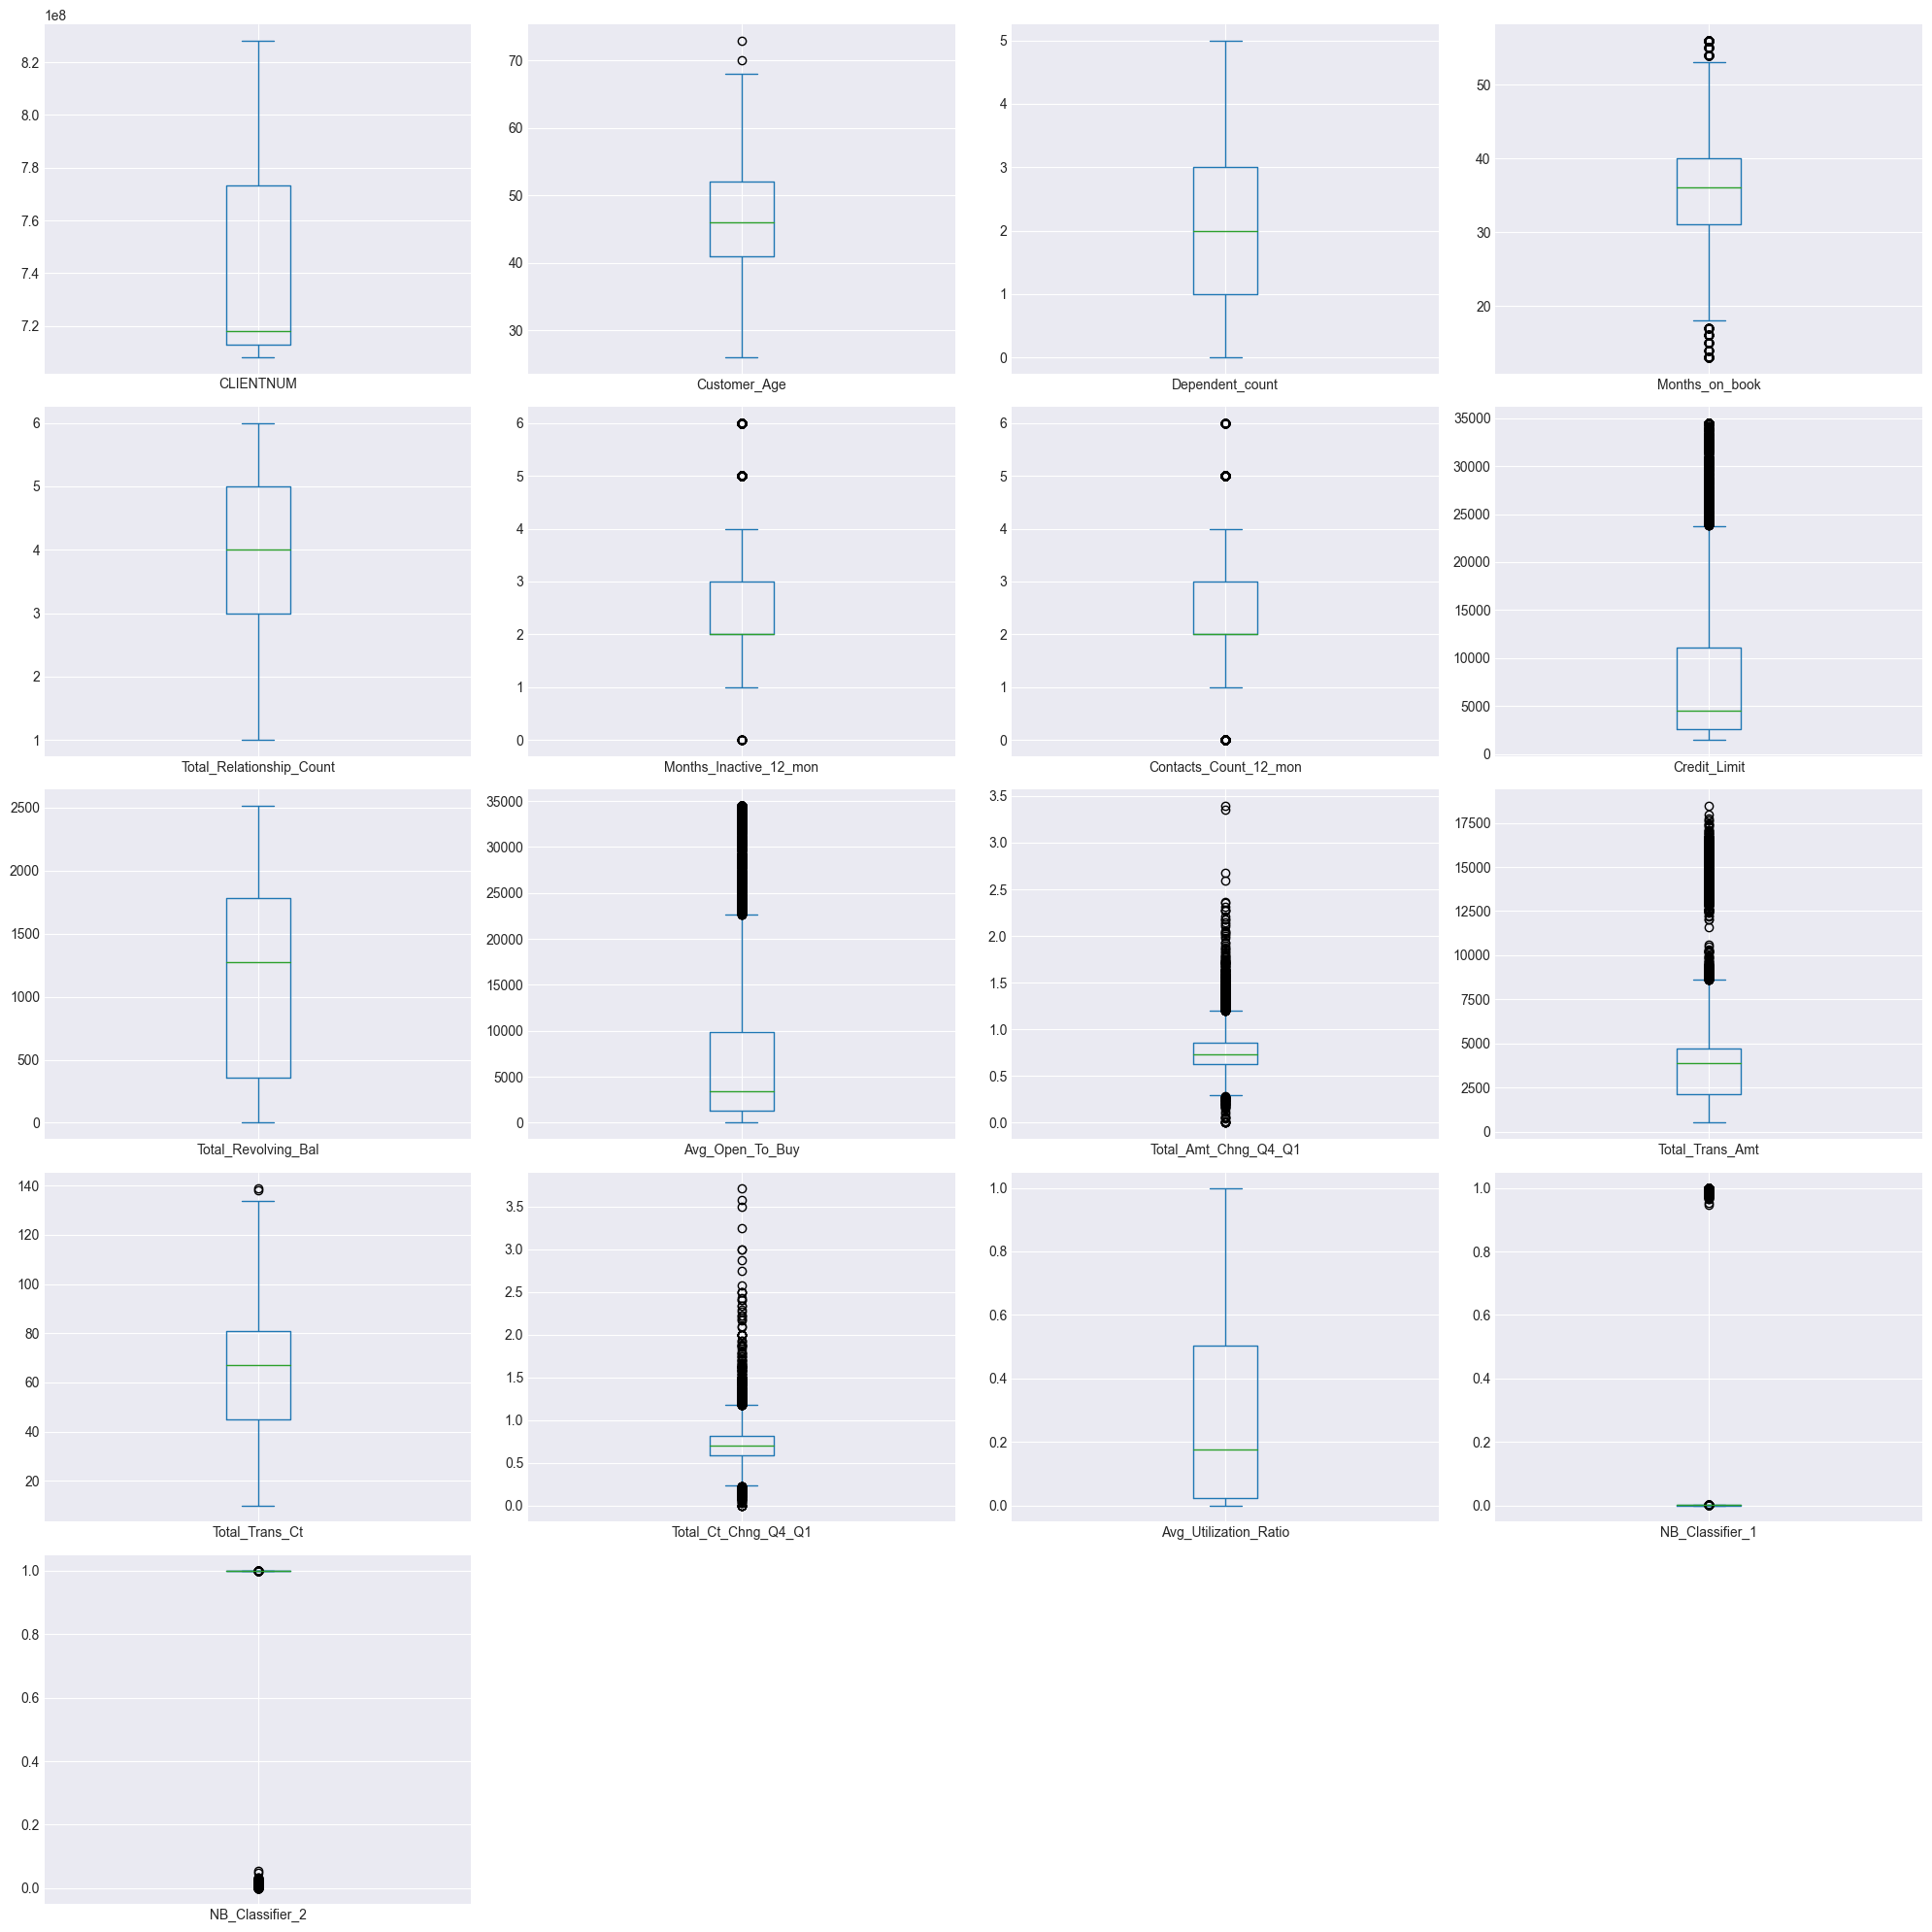

In [49]:
plt.figure(figsize=(25, 20), dpi=100)
df1.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show()

### Treating for Outliers

In [50]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [51]:
df1.shape

(10127, 24)

In [52]:
sample_outliers = detect_outliers_iqr(df1['Total_Trans_Amt'])
df1.drop(df1[df1['Total_Trans_Amt'].isin(sample_outliers)].index, inplace=True)

In [53]:
df1.shape

(9231, 24)

In [54]:
sample_outliers = detect_outliers_iqr(df1['Total_Amt_Chng_Q4_Q1'])
df1.drop(df1[df1['Total_Amt_Chng_Q4_Q1'].isin(sample_outliers)].index, inplace=True)

In [55]:
df1.shape

(8855, 24)

In [56]:
sample_outliers = detect_outliers_iqr(df1['Total_Ct_Chng_Q4_Q1'])
df1.drop(df1[df1['Total_Ct_Chng_Q4_Q1'].isin(sample_outliers)].index, inplace=True)

In [57]:
df1.shape

(8586, 24)

<Figure size 2500x2000 with 0 Axes>

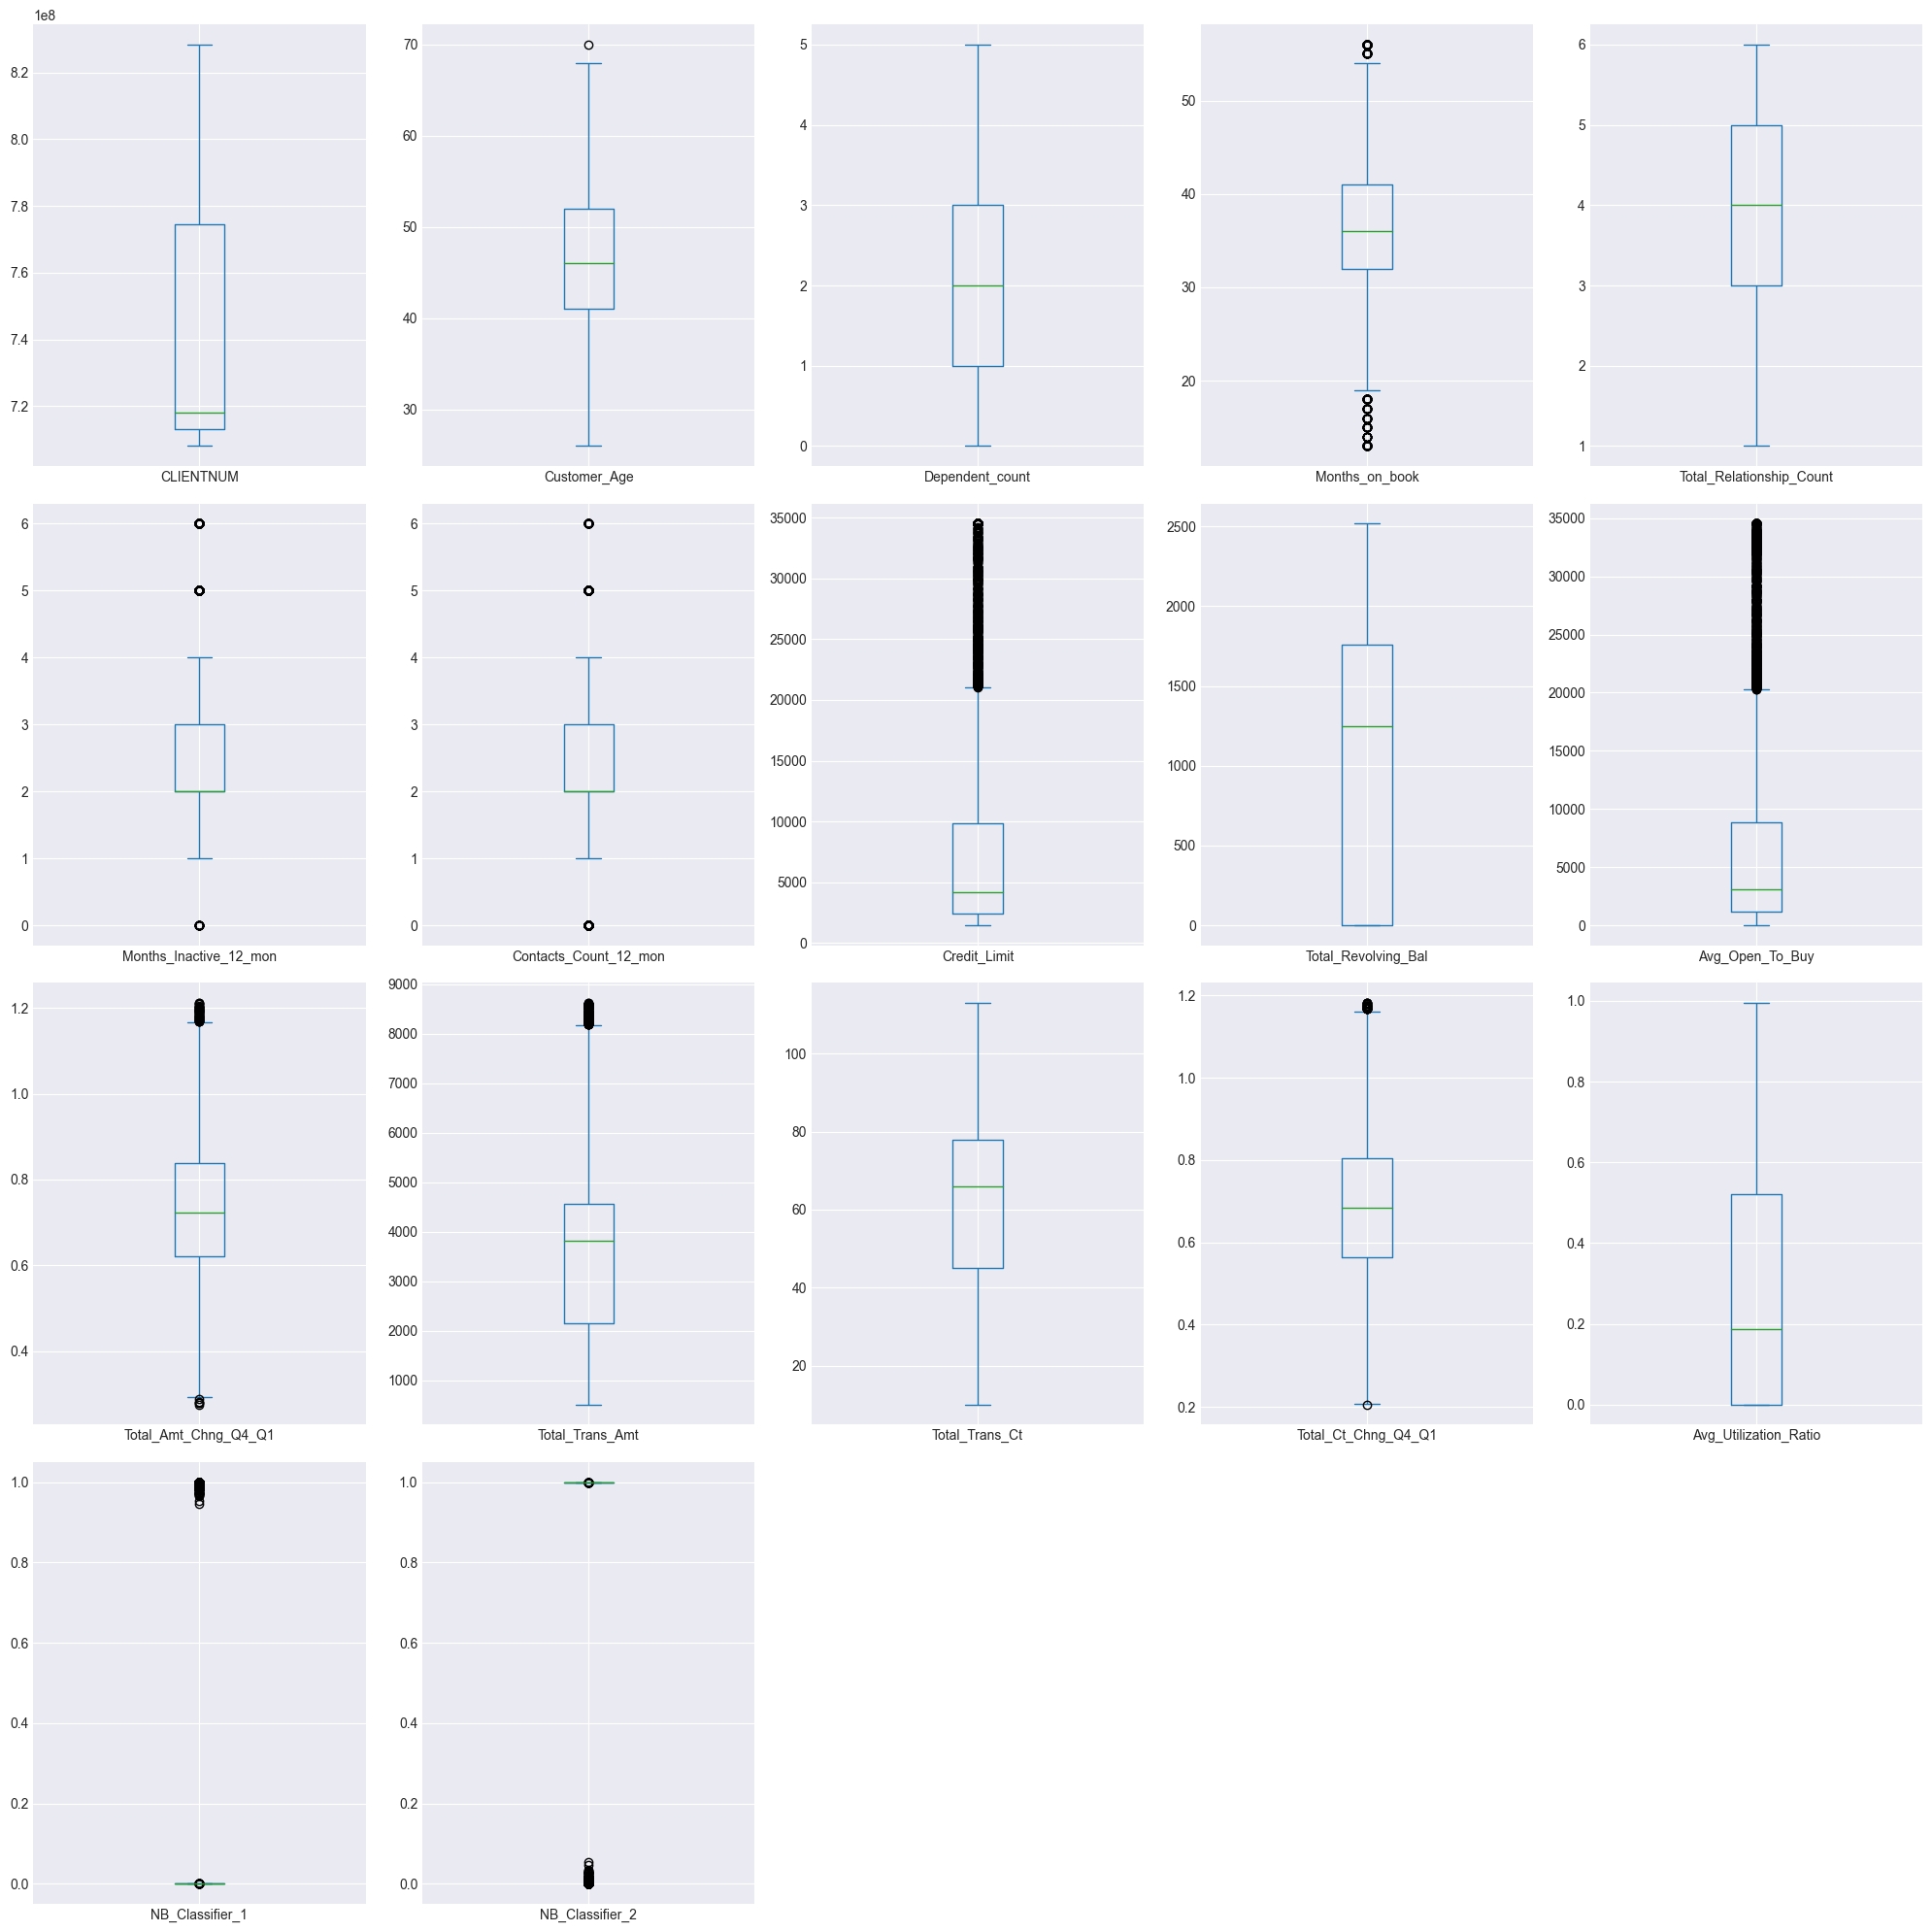

In [58]:
plt.figure(figsize=(25, 20), dpi=100)
df1.plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show()

## Encoding

In [59]:
df1.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_Classifier_1', 'NB_Classifier_2', 'Age_Group'],
      dtype='object')

In [60]:
cate = df1.select_dtypes('object')
cate

Attrition_Flag Gender Education_Level Marital_Status  \
10     Existing Customer      M      Uneducated        Unknown   
14     Existing Customer      F        Graduate        Married   
19     Existing Customer      F        Graduate        Married   
20     Existing Customer      M       Doctorate       Divorced   
21     Attrited Customer      F        Graduate        Married   
...                  ...    ...             ...            ...   
10054  Attrited Customer      F       Doctorate         Single   
10067  Attrited Customer      F      Uneducated        Married   
10089  Attrited Customer      F         Unknown        Married   
10103  Attrited Customer      M     High School        Married   
10125  Attrited Customer      M        Graduate        Unknown   

      Income_Category Card_Category  
10            $120K +          Blue  
14     Less than $40K          Blue  
19            Unknown          Blue  
20        $60K - $80K          Blue  
21     Less than $40K          Blue  
...               ...           ...  
10054  Less than $40K          Blue  
10067     $40K - $60K          Blue  
10089  Less than $40K          Blue  
10103    $80K - $120K          Blue  
10125     $40K - $60K          Blue  

[8586 rows x 6 columns]

In [61]:
for i in cate.columns:
    print(i, cate[i].unique())

Attrition_Flag ['Existing Customer' 'Attrited Customer']
Gender ['M' 'F']
Education_Level ['Uneducated' 'Graduate' 'Doctorate' 'Unknown' 'High School' 'College'
 'Post-Graduate']
Marital_Status ['Unknown' 'Married' 'Divorced' 'Single']
Income_Category ['$120K +' 'Less than $40K' 'Unknown' '$60K - $80K' '$80K - $120K'
 '$40K - $60K']
Card_Category ['Blue' 'Silver' 'Gold' 'Platinum']


In [62]:
df1['Age_Group'].unique()

['Adult', 'Senior', 'Young Adult']
Categories (3, object): ['Young Adult' < 'Adult' < 'Senior']

In [63]:
cate.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [64]:
df1['Education_Level'].unique()

array(['Uneducated', 'Graduate', 'Doctorate', 'Unknown', 'High School',
       'College', 'Post-Graduate'], dtype=object)

In [65]:
income_categories = [['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']]
ordinal_incomeFetures =  ['Income_Category']
ordinal_incomeEncoder = OrdinalEncoder(categories= income_categories)

card_categories = [['Blue', 'Silver', 'Gold', 'Platinum']]
ordinal_cardFetures = ['Card_Category']
ordinal_cardEncoder = OrdinalEncoder(categories= card_categories)

Age_categories = [['Young Adult','Adult', 'Senior']]
ordinal_AgeFetures = ['Age_Group']
ordinal_AgeEncoder = OrdinalEncoder(categories= Age_categories)

Edu_categories = [['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate' ]]
ordinal_EduFetures = ['Education_Level']
ordinal_EduEncoder = OrdinalEncoder(categories= Edu_categories)


In [66]:
df1['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [67]:
#encoder = LabelEncoder()
#df1['Gender'] = encoder.fit_transform(df1['Gender'])

In [68]:
categorical_feaures = ['Gender', 'Marital_Status']
categorical_encoder = OneHotEncoder(sparse_output= False)


df1['Attrition_Flag'] = df1['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

In [69]:
ct = ColumnTransformer(transformers=[ 
                      ('ordIncome', ordinal_incomeEncoder, ordinal_incomeFetures),
                      ('ordCard', ordinal_cardEncoder, ordinal_cardFetures),
                      ('ordAge', ordinal_AgeEncoder, ordinal_AgeFetures),
                      ('cat', categorical_encoder, categorical_feaures)
                    ])

ct.set_output(transform='pandas')
encoded_df = ct.fit_transform(df1)
encoded_df.head()

ordIncome__Income_Category  ordCard__Card_Category  ordAge__Age_Group  \
10                         5.0                     0.0                1.0   
14                         1.0                     0.0                2.0   
19                         0.0                     0.0                1.0   
20                         3.0                     0.0                1.0   
21                         1.0                     0.0                2.0   

    cat__Gender_F  cat__Gender_M  cat__Marital_Status_Divorced  \
10            0.0            1.0                           0.0   
14            1.0            0.0                           0.0   
19            1.0            0.0                           0.0   
20            0.0            1.0                           1.0   
21            1.0            0.0                           0.0   

    cat__Marital_Status_Married  cat__Marital_Status_Single  \
10                          0.0                         0.0   
14                          1.0                         0.0   
19                          1.0                         0.0   
20                          0.0                         0.0   
21                          1.0                         0.0   

    cat__Marital_Status_Unknown  
10                          1.0  
14                          0.0  
19                          0.0  
20                          0.0  
21                          0.0

In [70]:
encoded_df.shape

(8586, 9)

In [71]:
df1.shape

(8586, 24)

In [72]:
dfx = df1.copy()

In [73]:
columns_to_drop = ordinal_incomeFetures + ordinal_cardFetures + ordinal_AgeFetures + ordinal_EduFetures + categorical_feaures
print(columns_to_drop)
dfx = dfx.drop(columns=columns_to_drop)

['Income_Category', 'Card_Category', 'Age_Group', 'Education_Level', 'Gender', 'Marital_Status']


In [74]:
dfx= pd.concat([dfx, pd.DataFrame(encoded_df)], axis=1)
dfx

CLIENTNUM  Attrition_Flag  Customer_Age  Dependent_count  \
10     708790833               0            42                5   
14     712396908               0            57                2   
19     709327383               0            45                2   
20     806165208               0            47                1   
21     708508758               1            62                0   
...          ...             ...           ...              ...   
10054  779134458               1            33                1   
10067  717390408               1            49                4   
10089  720328983               1            52                5   
10103  717185658               1            51                1   
10125  717406983               1            30                2   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10                 31                         5                       3   
14                 48                         5                       2   
19                 37                         6                       1   
20                 42                         5                       2   
21                 49                         2                       3   
...               ...                       ...                     ...   
10054              15                         1                       1   
10067              36                         5                       2   
10089              36                         4                       3   
10103              36                         4                       3   
10125              36                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  ...  \
10                         2        6748.0                 1467  ...   
14                         2        2436.0                  680  ...   
19                         2       14470.0                 1157  ...   
20                         0       20979.0                 1800  ...   
21                         3        1438.3                    0  ...   
...                      ...           ...                  ...  ...   
10054                      3        3709.0                 1180  ...   
10067                      3        4167.0                    0  ...   
10089                      3        9611.0                    0  ...   
10103                      4       22754.0                    0  ...   
10125                      3        5281.0                    0  ...   

       NB_Classifier_2  ordIncome__Income_Category  ordCard__Card_Category  \
10            0.999810                         5.0                     0.0   
14            0.999890                         1.0                     0.0   
19            0.999940                         0.0                     0.0   
20            0.999940                         3.0                     0.0   
21            0.003836                         1.0                     0.0   
...                ...                         ...                     ...   
10054         0.007880                         1.0                     0.0   
10067         0.004820                         2.0                     0.0   
10089         0.002904                         1.0                     0.0   
10103         0.002118                         4.0                     0.0   
10125         0.003294                         2.0                     0.0   

       ordAge__Age_Group  cat__Gender_F  cat__Gender_M  \
10                   1.0            0.0            1.0   
14                   2.0            1.0            0.0   
19                   1.0            1.0            0.0   
20                   1.0            0.0            1.0   
21                   2.0            1.0            0.0   
...                  ...            ...            ...   
10054                0.0            1.0            0.0   
10067                1.0           

In [75]:
dfx.groupby('Attrition_Flag').size()

Attrition_Flag
0    7148
1    1438
dtype: int64

In [76]:
dfx['Attrition_Flag']

10       0
14       0
19       0
20       0
21       1
        ..
10054    1
10067    1
10089    1
10103    1
10125    1
Name: Attrition_Flag, Length: 8586, dtype: int64

In [77]:
features = [f for f in dfx.columns if f != 'Attrition_Flag']
target = [t for t in dfx.columns if t == 'Attrition_Flag' ]

feature_df = dfx[features]
label_df = dfx[target]

oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, label_df)

In [78]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {dfx.Attrition_Flag.value_counts()}')

new label count: Attrition_Flag
0                 7148
1                 7148
Name: count, dtype: int64
old label count: Attrition_Flag
0    7148
1    1438
Name: count, dtype: int64


In [79]:
dfx = pd.concat([transformed_feature_df,transformed_label_df],axis=1, join='outer')
dfx

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0      708790833            42                5              31   
1      712396908            57                2              48   
2      709327383            45                2              37   
3      806165208            47                1              42   
4      708508758            62                0              49   
...          ...           ...              ...             ...   
14291  789376933            49                2              39   
14292  720740709            48                3              36   
14293  708537299            46                1              28   
14294  766931959            56                0              43   
14295  708972550            48                3              37   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       3   
1                             5                       2   
2                             6                       1   
3                             5                       2   
4                             2                       3   
...                         ...                     ...   
14291                         4                       2   
14292                         3                       3   
14293                         2                       3   
14294                         4                       3   
14295                         2                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          2   6748.000000                 1467   
1                          2   2436.000000                  680   
2                          2  14470.000000                 1157   
3                          0  20979.000000                 1800   
4                          3   1438.300000                    0   
...                      ...           ...                  ...   
14291                      2  10121.080050                  847   
14292                      3   2686.429647                 2274   
14293                      2   2844.536936                 1377   
14294                      3   3906.136637                  872   
14295                      2   1744.096346                    0   

       Avg_Open_To_Buy  ...  ordIncome__Income_Category  \
0          5281.000000  ...                    5.000000   
1          1756.000000  ...                    1.000000   
2         13313.000000  ...                    0.000000   
3         19179.000000  ...                    3.000000   
4          1438.300000  ...                    1.000000   
...                ...  ...                         ...   
14291      9273.831940  ...                    1.673221   
14292       411.439007  ...                    0.938140   
14293      1467.193671  ...                    0.650268   
14294      3033.320052  ...                    4.004532   
14295      1744.096346  ...                    1.040614   

       ordCard__Card_Category  ordAge__Age_Group  cat__Gender_F  \
0                         0.0           1.000000       0.000000   
1                         0.0           2.000000       1.000000   
2                         0.0           1.000000       1.000000   
3                         0.0           1.000000       0.000000   
4                         0.0           2.000000       1.000000   
...                       ...                ...            ...   
14291                     0.0           1.663390       0.663390   
14292                     0.0           1.061860       1.000000   
14293                     0.0           1.000000       1.000000   
14294                     0.0           1.751133       0.248867   
14295                     0.0           1.000000       0.989847   

       cat__Gender_M  cat__Marital_Status_Divorced  \
0           1.000000                      0.000000   
1           0.000000                      0.000000   
2           

In [80]:
dfx.describe().T

count          mean           std  \
CLIENTNUM                     14296.0  7.380789e+08  3.651647e+07   
Customer_Age                  14296.0  4.651686e+01  7.239634e+00   
Dependent_count               14296.0  2.231673e+00  1.206914e+00   
Months_on_book                14296.0  3.601658e+01  7.338567e+00   
Total_Relationship_Count      14296.0  3.535744e+00  1.501538e+00   
Months_Inactive_12_mon        14296.0  2.378428e+00  9.198258e-01   
Contacts_Count_12_mon         14296.0  2.516998e+00  1.022717e+00   
Credit_Limit                  14296.0  7.721198e+03  8.030973e+03   
Total_Revolving_Bal           14296.0  9.484822e+02  8.268176e+02   
Avg_Open_To_Buy               14296.0  6.772578e+03  8.029987e+03   
Total_Amt_Chng_Q4_Q1          14296.0  7.178239e-01  1.641477e-01   
Total_Trans_Amt               14296.0  3.261596e+03  1.645086e+03   
Total_Trans_Ct                14296.0  5.483324e+01  1.895354e+01   
Total_Ct_Chng_Q4_Q1           14296.0  6.321721e-01  1.816604e-01   
Avg_Utilization_Ratio         14296.0  2.376955e-01  2.659875e-01   
NB_Classifier_1               14296.0  4.975702e-01  4.974067e-01   
NB_Classifier_2               14296.0  5.024298e-01  4.974067e-01   
ordIncome__Income_Category    14296.0  2.011041e+00  1.365177e+00   
ordCard__Card_Category        14296.0  6.615314e-02  2.798989e-01   
ordAge__Age_Group             14296.0  1.237678e+00  5.370446e-01   
cat__Gender_F                 14296.0  5.704950e-01  4.618488e-01   
cat__Gender_M                 14296.0  4.295050e-01  4.618488e-01   
cat__Marital_Status_Divorced  14296.0  7.639033e-02  2.465402e-01   
cat__Marital_Status_Married   14296.0  4.437973e-01  4.634530e-01   
cat__Marital_Status_Single    14296.0  4.028732e-01  4.563672e-01   
cat__Marital_Status_Unknown   14296.0  7.693917e-02  2.475679e-01   
Attrition_Flag                14296.0  5.000000e-01  5.000175e-01   

                                       min           25%           50%  \
CLIENTNUM                     7.080833e+08  7.127957e+08  7.175753e+08   
Customer_Age                  2.600000e+01  4.200000e+01  4.600000e+01   
Dependent_count               0.000000e+00  1.000000e+00  2.000000e+00   
Months_on_book                1.300000e+01  3.200000e+01  3.600000e+01   
Total_Relationship_Count      1.000000e+00  2.000000e+00  3.000000e+00   
Months_Inactive_12_mon        0.000000e+00  2.000000e+00  2.000000e+00   
Contacts_Count_12_mon         0.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit                  1.438300e+03  2.507000e+03  4.352555e+03   
Total_Revolving_Bal           0.000000e+00  0.000000e+00  9.245000e+02   
Avg_Open_To_Buy               1.000000e+01  1.470134e+03  3.482923e+03   
Total_Amt_Chng_Q4_Q1          2.750000e-01  6.050000e-01  7.113483e-01   
Total_Trans_Amt               5.100000e+02  2.052750e+03  2.662500e+03   
Total_Trans_Ct                1.000000e+01  4.000000e+01  5.000000e+01   
Total_Ct_Chng_Q4_Q1           2.060000e-01  5.000000e-01  6.250000e-01   
Avg_Utilization_Ratio         0.000000e+00  0.000000e+00  1.260111e-01   
NB_Classifier_1               7.664200e-06  1.595800e-04  4.736133e-01   
NB_Classifier_2               4.199800e-04  4.255636e-03  5.263850e-01   
ordIncome__Income_Category    0.000000e+00  1.000000e+00  1.889519e+00   
ordCard__Card_Category        0.000000e+00  0.000000e+00  0.000000e+00   
ordAge__Age_Group             0.000000e+00  1.000000e+00  1.000000e+00   
cat__Gender_F                 0.000000e+00  0.000000e+00  8.696260e-01   
cat__Gender_M                 0.000000e+00  0.000000e+00  1.303740e-01   
cat__Marital_Status_Divorced  0.000000e+00  0.000000e+00  0.000000e+00   
cat__Marital_Status_Married   0.000000e+00  0.000000e+00  2.069474e-01   
cat__Marital_Status_Single    0.000000e+00  0.000000e+00  8.621968e-03   
cat__Marital_Status_Unknown   0.000000e+00  0.000000e+00  0.000000e+00   
Attrition_Flag                0.000000e+00  0.000000e+00  5.000000e-01   

                          

In [81]:
feature = [f for f in dfx.columns if f != 'Attrition_Flag']
target =  [t for t in dfx.columns if t == 'Attrition_Flag']

X = dfx[feature].values
y = dfx[target].values

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size= 0.20, random_state=7)

In [83]:
X_train_df = pd.DataFrame(X_train, columns=feature)
X_train_df

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0      772449858.0          51.0              3.0            41.0   
1      712042761.0          48.0              2.0            40.0   
2      788502858.0          58.0              3.0            51.0   
3      712445879.0          37.0              0.0            18.0   
4      716982483.0          49.0              2.0            38.0   
...            ...           ...              ...             ...   
11431  713732883.0          38.0              0.0            36.0   
11432  719740208.0          49.0              3.0            39.0   
11433  788701608.0          42.0              4.0            26.0   
11434  715941109.0          39.0              1.0            28.0   
11435  718488667.0          49.0              1.0            30.0   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                           5.0                     3.0   
1                           1.0                     3.0   
2                           2.0                     2.0   
3                           3.0                     1.0   
4                           3.0                     4.0   
...                         ...                     ...   
11431                       4.0                     1.0   
11432                       3.0                     2.0   
11433                       5.0                     2.0   
11434                       2.0                     3.0   
11435                       3.0                     3.0   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                        4.0   7570.000000               1388.0   
1                        3.0  11581.189166               1163.0   
2                        1.0  10021.000000               1952.0   
3                        4.0   2728.892910                378.0   
4                        2.0   1438.300000                  0.0   
...                      ...           ...                  ...   
11431                    2.0   1679.000000                  0.0   
11432                    4.0   2863.805503                850.0   
11433                    3.0   2950.000000               1705.0   
11434                    2.0   2591.804443                577.0   
11435                    4.0   6830.741893                907.0   

       Avg_Open_To_Buy  ...  NB_Classifier_2  ordIncome__Income_Category  \
0          6182.000000  ...         0.999460                    2.000000   
1         10417.796730  ...         0.002088                    0.759835   
2          8069.000000  ...         0.999930                    4.000000   
3          2350.666255  ...         0.006124                    0.247207   
4          1438.300000  ...         0.999780                    1.000000   
...                ...  ...              ...                         ...   
11431      1679.000000  ...         0.999950                    1.000000   
11432      2013.500357  ...         0.002034                    1.000000   
11433      1245.000000  ...         0.999800                    1.000000   
11434      2014.377071  ...         0.003821                    2.000000   
11435      5923.645256  ...         0.001293                    1.000000   

       ordCard__Card_Category  ordAge__Age_Group  cat__Gender_F  \
0                    0.000000           2.000000       0.000000   
1                    0.253278           1.000000       0.746722   
2                    0.000000           2.000000       0.000000   
3                    0.000000           0.247207       1.000000   
4                    0.000000           1.000000       1.000000   
...                       ...                ...            ...   
11431                0.000000           1.000000       1.000000   
11432                0.000000           1.904580       1.000000   
11433                0.000000           1.000000       1.000000   
11434                0.000000           1.000000       1.000000   
11435           

In [84]:
X_train_df.describe().T

count          mean           std  \
CLIENTNUM                     11436.0  7.378323e+08  3.638007e+07   
Customer_Age                  11436.0  4.655526e+01  7.211649e+00   
Dependent_count               11436.0  2.231637e+00  1.208966e+00   
Months_on_book                11436.0  3.606829e+01  7.302973e+00   
Total_Relationship_Count      11436.0  3.538475e+00  1.506612e+00   
Months_Inactive_12_mon        11436.0  2.382564e+00  9.223117e-01   
Contacts_Count_12_mon         11436.0  2.513204e+00  1.026326e+00   
Credit_Limit                  11436.0  7.726754e+03  8.055285e+03   
Total_Revolving_Bal           11436.0  9.448764e+02  8.245563e+02   
Avg_Open_To_Buy               11436.0  6.781741e+03  8.051975e+03   
Total_Amt_Chng_Q4_Q1          11436.0  7.175041e-01  1.649879e-01   
Total_Trans_Amt               11436.0  3.248976e+03  1.643066e+03   
Total_Trans_Ct                11436.0  5.469850e+01  1.892643e+01   
Total_Ct_Chng_Q4_Q1           11436.0  6.315335e-01  1.815715e-01   
Avg_Utilization_Ratio         11436.0  2.367195e-01  2.652861e-01   
NB_Classifier_1               11436.0  4.993092e-01  4.974085e-01   
NB_Classifier_2               11436.0  5.006909e-01  4.974085e-01   
ordIncome__Income_Category    11436.0  2.011117e+00  1.361364e+00   
ordCard__Card_Category        11436.0  6.568388e-02  2.758220e-01   
ordAge__Age_Group             11436.0  1.240786e+00  5.360313e-01   
cat__Gender_F                 11436.0  5.702425e-01  4.619940e-01   
cat__Gender_M                 11436.0  4.297575e-01  4.619940e-01   
cat__Marital_Status_Divorced  11436.0  7.477469e-02  2.432946e-01   
cat__Marital_Status_Married   11436.0  4.473889e-01  4.635566e-01   
cat__Marital_Status_Single    11436.0  4.027430e-01  4.561536e-01   
cat__Marital_Status_Unknown   11436.0  7.509341e-02  2.447570e-01   

                                       min           25%           50%  \
CLIENTNUM                     7.080833e+08  7.127667e+08  7.174390e+08   
Customer_Age                  2.600000e+01  4.200000e+01  4.700000e+01   
Dependent_count               0.000000e+00  1.000000e+00  2.000000e+00   
Months_on_book                1.300000e+01  3.200000e+01  3.600000e+01   
Total_Relationship_Count      1.000000e+00  2.000000e+00  3.000000e+00   
Months_Inactive_12_mon        0.000000e+00  2.000000e+00  2.000000e+00   
Contacts_Count_12_mon         0.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit                  1.438300e+03  2.500000e+03  4.342970e+03   
Total_Revolving_Bal           0.000000e+00  0.000000e+00  9.215000e+02   
Avg_Open_To_Buy               1.400000e+01  1.474000e+03  3.478823e+03   
Total_Amt_Chng_Q4_Q1          2.750000e-01  6.040000e-01  7.110000e-01   
Total_Trans_Amt               5.100000e+02  2.048000e+03  2.653500e+03   
Total_Trans_Ct                1.000000e+01  4.000000e+01  5.000000e+01   
Total_Ct_Chng_Q4_Q1           2.060000e-01  4.998143e-01  6.249180e-01   
Avg_Utilization_Ratio         0.000000e+00  0.000000e+00  1.260000e-01   
NB_Classifier_1               7.664200e-06  1.585425e-04  9.724911e-01   
NB_Classifier_2               4.199800e-04  4.226173e-03  2.750886e-02   
ordIncome__Income_Category    0.000000e+00  1.000000e+00  1.889519e+00   
ordCard__Card_Category        0.000000e+00  0.000000e+00  0.000000e+00   
ordAge__Age_Group             0.000000e+00  1.000000e+00  1.000000e+00   
cat__Gender_F                 0.000000e+00  0.000000e+00  8.696260e-01   
cat__Gender_M                 0.000000e+00  0.000000e+00  1.303740e-01   
cat__Marital_Status_Divorced  0.000000e+00  0.000000e+00  0.000000e+00   
cat__Marital_Status_Married   0.000000e+00  0.000000e+00  2.321039e-01   
cat__Marital_Status_Single    0.000000e+00  0.000000e+00  8.935611e-03   
cat__Marital_Status_Unknown   0.000000e+00  0.000000e+00  0.000000e+00   

                                       75%           max  
CLIENTNUM                     7.722325e+08  8.283431e+08  
Customer_Age                  5.100000e+01  7.00000

In [85]:
#initiation
scaler = MinMaxScaler(feature_range = (0,1)).fit(X_train_df)
R_Xtrain_df = scaler.transform(X_train_df)
R_Xtest_df = scaler.transform(X_test)

In [86]:
R_Xtrain_df = pd.DataFrame(R_Xtrain_df, columns = feature)
R_Xtrain_df.describe().T

count      mean       std  min       25%  \
CLIENTNUM                     11436.0  0.247373  0.302512  0.0  0.038944   
Customer_Age                  11436.0  0.467165  0.163901  0.0  0.363636   
Dependent_count               11436.0  0.446327  0.241793  0.0  0.200000   
Months_on_book                11436.0  0.536472  0.169837  0.0  0.441860   
Total_Relationship_Count      11436.0  0.507695  0.301322  0.0  0.200000   
Months_Inactive_12_mon        11436.0  0.397094  0.153719  0.0  0.333333   
Contacts_Count_12_mon         11436.0  0.418867  0.171054  0.0  0.333333   
Credit_Limit                  11436.0  0.190112  0.243526  0.0  0.032097   
Total_Revolving_Bal           11436.0  0.375398  0.327595  0.0  0.000000   
Avg_Open_To_Buy               11436.0  0.196155  0.233377  0.0  0.042316   
Total_Amt_Chng_Q4_Q1          11436.0  0.472256  0.176081  0.0  0.351121   
Total_Trans_Amt               11436.0  0.337812  0.202648  0.0  0.189689   
Total_Trans_Ct                11436.0  0.433966  0.183752  0.0  0.291262   
Total_Ct_Chng_Q4_Q1           11436.0  0.435997  0.186036  0.0  0.301039   
Avg_Utilization_Ratio         11436.0  0.238148  0.266887  0.0  0.000000   
NB_Classifier_1               11436.0  0.499515  0.497621  0.0  0.000151   
NB_Classifier_2               11436.0  0.500486  0.497622  0.0  0.003808   
ordIncome__Income_Category    11436.0  0.402223  0.272273  0.0  0.200000   
ordCard__Card_Category        11436.0  0.021895  0.091941  0.0  0.000000   
ordAge__Age_Group             11436.0  0.620393  0.268016  0.0  0.500000   
cat__Gender_F                 11436.0  0.570242  0.461994  0.0  0.000000   
cat__Gender_M                 11436.0  0.429758  0.461994  0.0  0.000000   
cat__Marital_Status_Divorced  11436.0  0.074775  0.243295  0.0  0.000000   
cat__Marital_Status_Married   11436.0  0.447389  0.463557  0.0  0.000000   
cat__Marital_Status_Single    11436.0  0.402743  0.456154  0.0  0.000000   
cat__Marital_Status_Unknown   11436.0  0.075093  0.244757  0.0  0.000000   

                                   50%       75%  max  
CLIENTNUM                     0.077796  0.533422  1.0  
Customer_Age                  0.477273  0.568182  1.0  
Dependent_count               0.400000  0.600000  1.0  
Months_on_book                0.534884  0.627907  1.0  
Total_Relationship_Count      0.400000  0.800000  1.0  
Months_Inactive_12_mon        0.333333  0.500000  1.0  
Contacts_Count_12_mon         0.500000  0.500000  1.0  
Credit_Limit                  0.087814  0.241497  1.0  
Total_Revolving_Bal           0.366110  0.642034  1.0  
Avg_Open_To_Buy               0.100424  0.246675  1.0  
Total_Amt_Chng_Q4_Q1          0.465315  0.590802  1.0  
Total_Trans_Amt               0.264369  0.472126  1.0  
Total_Trans_Ct                0.388350  0.592233  1.0  
Total_Ct_Chng_Q4_Q1           0.429219  0.559709  1.0  
Avg_Utilization_Ratio         0.126761  0.428571  1.0  
NB_Classifier_1               0.972900  0.996192  1.0  
NB_Classifier_2               0.027101  0.999850  1.0  
ordIncome__Income_Category    0.377904  0.600000  1.0  
ordCard__Card_Category        0.000000  0.000000  1.0  
ordAge__Age_Group             0.500000  0.940070  1.0  
cat__Gender_F                 0.869626  1.000000  1.0  
cat__Gender_M                 0.130374  1.000000  1.0  
cat__Marital_Status_Divorced  0.000000  0.000000  1.0  
cat__Marital_Status_Married   0.232104  1.000000  1.0  
cat__Marital_Status_Single    0.008936  1.000000  1.0  
cat__Marital_Status_Unknown   0.000000  0.000000  1.0

<Figure size 2500x2000 with 0 Axes>

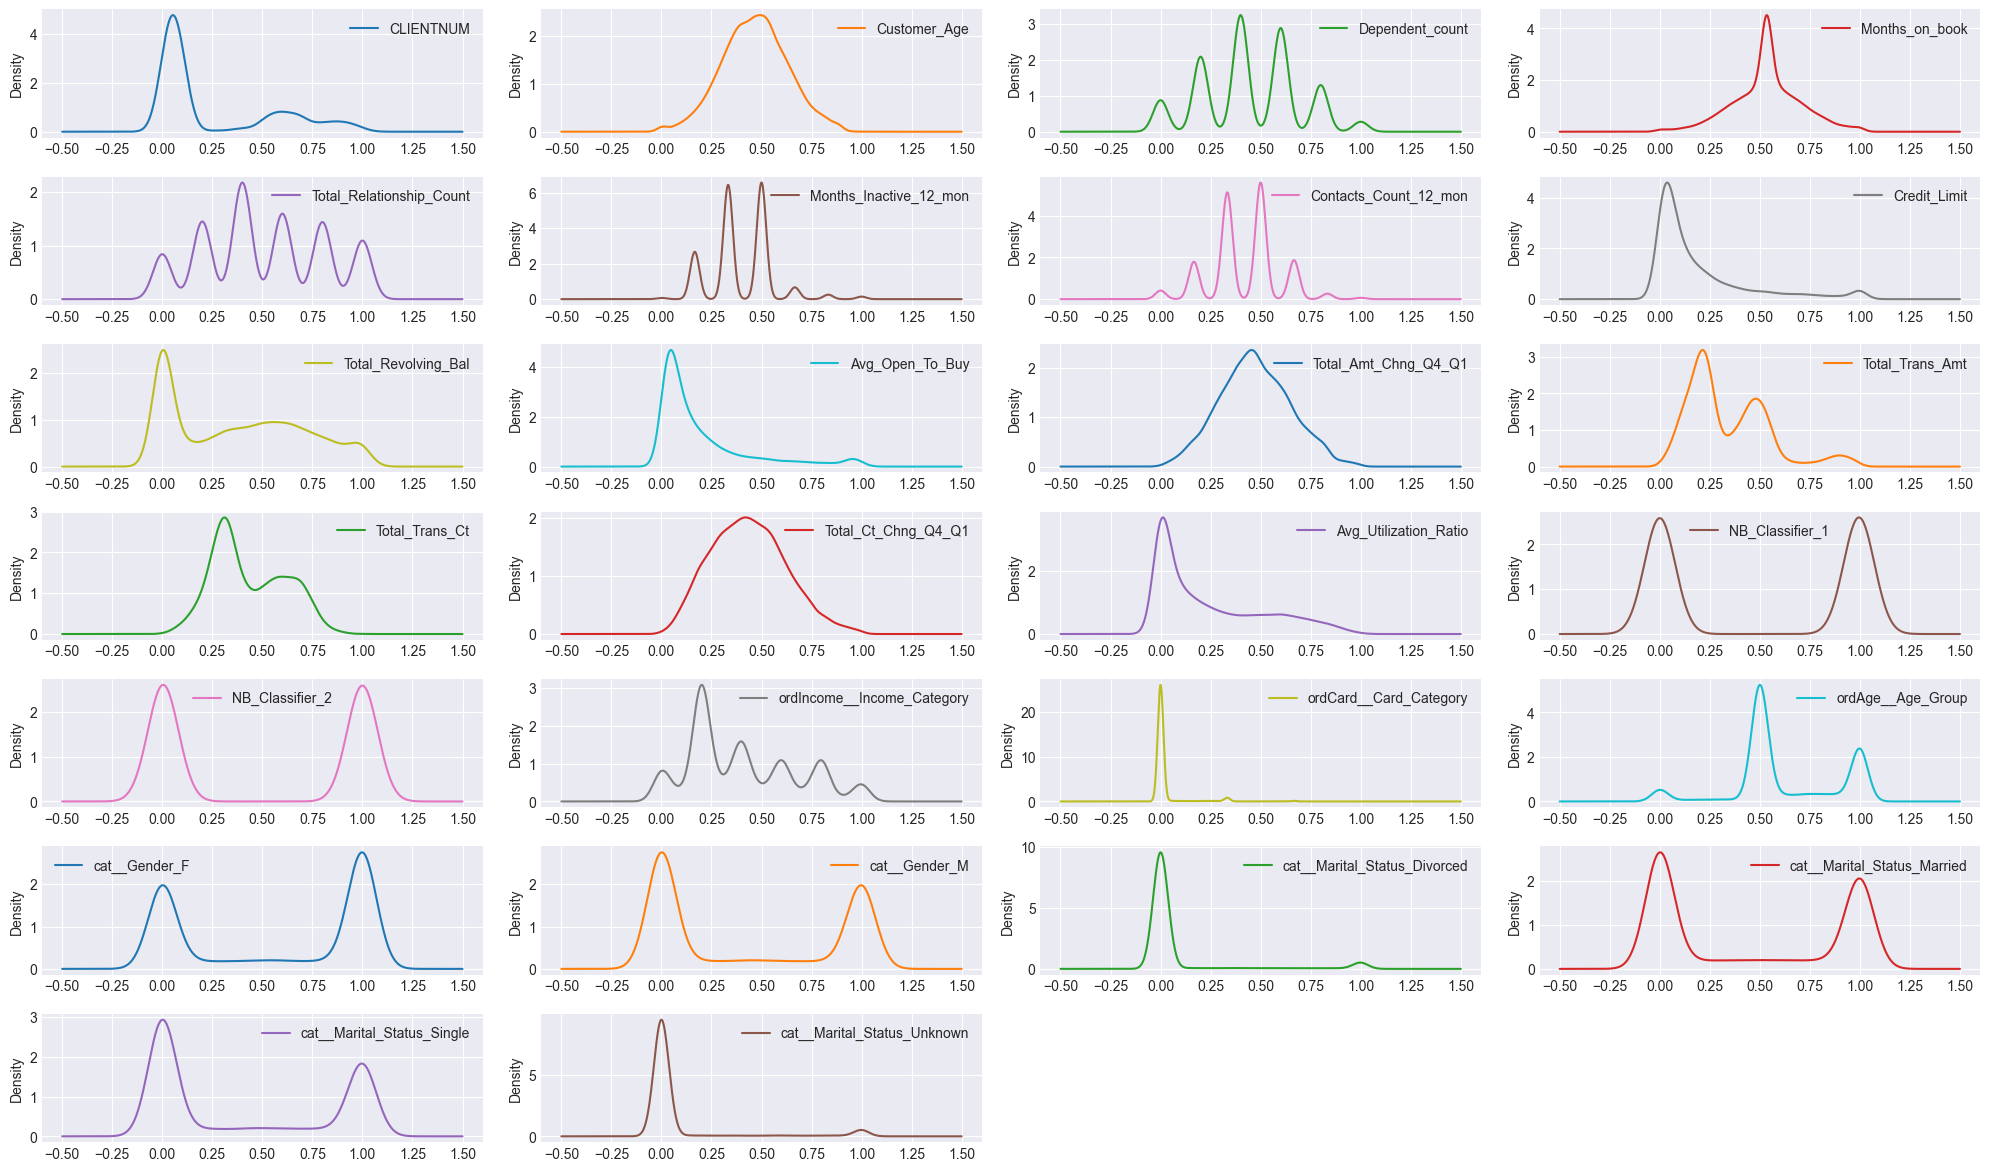

In [87]:
plt.figure(figsize=(25, 20), dpi= 100)
R_Xtrain_df.plot(kind='density', subplots=True, layout=(12,4), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show();

In [88]:
#instantiate
scaler = Normalizer().fit(R_Xtrain_df)
NR_Xtrain_df = scaler.transform(R_Xtrain_df)
NR_Xtest_df = scaler.transform(R_Xtest_df)

In [89]:
NR_Xtrain_df = pd.DataFrame(NR_Xtrain_df, columns = feature)
NR_Xtrain_df.describe().T

count      mean       std  min       25%  \
CLIENTNUM                     11436.0  0.093981  0.113316  0.0  0.015594   
Customer_Age                  11436.0  0.180995  0.058785  0.0  0.142518   
Dependent_count               11436.0  0.174144  0.092537  0.0  0.089361   
Months_on_book                11436.0  0.208176  0.060482  0.0  0.175600   
Total_Relationship_Count      11436.0  0.195724  0.111934  0.0  0.094078   
Months_Inactive_12_mon        11436.0  0.155451  0.058726  0.0  0.122181   
Contacts_Count_12_mon         11436.0  0.164532  0.068051  0.0  0.124055   
Credit_Limit                  11436.0  0.071071  0.085220  0.0  0.012451   
Total_Revolving_Bal           11436.0  0.141581  0.121047  0.0  0.000000   
Avg_Open_To_Buy               11436.0  0.074045  0.081761  0.0  0.017294   
Total_Amt_Chng_Q4_Q1          11436.0  0.183963  0.066824  0.0  0.138132   
Total_Trans_Amt               11436.0  0.130049  0.073379  0.0  0.077538   
Total_Trans_Ct                11436.0  0.167564  0.065076  0.0  0.119345   
Total_Ct_Chng_Q4_Q1           11436.0  0.168463  0.067523  0.0  0.119974   
Avg_Utilization_Ratio         11436.0  0.090801  0.100247  0.0  0.000000   
NB_Classifier_1               11436.0  0.207337  0.208493  0.0  0.000054   
NB_Classifier_2               11436.0  0.186028  0.185904  0.0  0.001580   
ordIncome__Income_Category    11436.0  0.154917  0.099532  0.0  0.076856   
ordCard__Card_Category        11436.0  0.007924  0.032739  0.0  0.000000   
ordAge__Age_Group             11436.0  0.239664  0.097232  0.0  0.187300   
cat__Gender_F                 11436.0  0.228865  0.185571  0.0  0.000000   
cat__Gender_M                 11436.0  0.164499  0.175231  0.0  0.000000   
cat__Marital_Status_Divorced  11436.0  0.029876  0.096369  0.0  0.000000   
cat__Marital_Status_Married   11436.0  0.175511  0.180862  0.0  0.000000   
cat__Marital_Status_Single    11436.0  0.158182  0.178237  0.0  0.000000   
cat__Marital_Status_Unknown   11436.0  0.029795  0.096251  0.0  0.000000   

                                   50%       75%       max  
CLIENTNUM                     0.030627  0.204489  0.422690  
Customer_Age                  0.184802  0.220769  0.358620  
Dependent_count               0.170453  0.242040  0.425632  
Months_on_book                0.211369  0.246861  0.395259  
Total_Relationship_Count      0.184699  0.288248  0.464486  
Months_Inactive_12_mon        0.152043  0.195565  0.412576  
Contacts_Count_12_mon         0.166762  0.208511  0.446885  
Credit_Limit                  0.035396  0.095807  0.383727  
Total_Revolving_Bal           0.142848  0.240286  0.436273  
Avg_Open_To_Buy               0.041027  0.098681  0.383431  
Total_Amt_Chng_Q4_Q1          0.181649  0.229705  0.408150  
Total_Trans_Amt               0.110919  0.175915  0.422824  
Total_Trans_Ct                0.156950  0.218984  0.366005  
Total_Ct_Chng_Q4_Q1           0.166888  0.213885  0.413615  
Avg_Utilization_Ratio         0.049766  0.167529  0.403286  
NB_Classifier_1               0.307717  0.413290  0.567553  
NB_Classifier_2               0.010455  0.370134  0.492976  
ordIncome__Income_Category    0.142651  0.233785  0.428176  
ordCard__Card_Category        0.000000  0.000000  0.374573  
ordAge__Age_Group             0.212274  0.334541  0.445997  
cat__Gender_F                 0.336040  0.391921  0.559263  
cat__Gender_M                 0.055899  0.353467  0.517287  
cat__Marital_Status_Divorced  0.000000  0.000000  0.517669  
cat__Marital_Status_Married   0.099107  0.366706  0.514103  
cat__Marital_Status_Single    0.003527  0.357309  0.513089  
cat__Marital_Status_Unknown   0.000000  0.000000  0.488035

In [90]:
NR_Xtest_df = pd.DataFrame(NR_Xtest_df, columns = feature)
NR_Xtest_df.describe().T

count      mean       std       min       25%  \
CLIENTNUM                     2860.0  0.097969  0.115792  0.000053  0.016223   
Customer_Age                  2860.0  0.179085  0.060226  0.000000  0.140826   
Dependent_count               2860.0  0.173988  0.091680  0.000000  0.088791   
Months_on_book                2860.0  0.205577  0.062366  0.000000  0.172568   
Total_Relationship_Count      2860.0  0.194636  0.110062  0.000000  0.095746   
Months_Inactive_12_mon        2860.0  0.154004  0.058598  0.000000  0.121061   
Contacts_Count_12_mon         2860.0  0.165594  0.067091  0.000000  0.123780   
Credit_Limit                  2860.0  0.070678  0.083759  0.000000  0.013177   
Total_Revolving_Bal           2860.0  0.144310  0.122790  0.000000  0.000000   
Avg_Open_To_Buy               2860.0  0.073453  0.080497 -0.000042  0.017330   
Total_Amt_Chng_Q4_Q1          2860.0  0.184425  0.065224  0.009132  0.140496   
Total_Trans_Amt               2860.0  0.132730  0.073292  0.000881  0.079659   
Total_Trans_Ct                2860.0  0.169770  0.065083  0.000000  0.121609   
Total_Ct_Chng_Q4_Q1           2860.0  0.169627  0.067593  0.000732  0.122178   
Avg_Utilization_Ratio         2860.0  0.092800  0.101854  0.000000  0.000000   
NB_Classifier_1               2860.0  0.203826  0.208545  0.000003  0.000056   
NB_Classifier_2               2860.0  0.189141  0.185820  0.000047  0.001644   
ordIncome__Income_Category    2860.0  0.154912  0.101068  0.000000  0.076192   
ordCard__Card_Category        2860.0  0.008211  0.034998  0.000000  0.000000   
ordAge__Age_Group             2860.0  0.236308  0.097992  0.000000  0.185935   
cat__Gender_F                 2860.0  0.228690  0.184541  0.000000  0.000000   
cat__Gender_M                 2860.0  0.164276  0.175098  0.000000  0.000000   
cat__Marital_Status_Divorced  2860.0  0.032281  0.100253  0.000000  0.000000   
cat__Marital_Status_Married   2860.0  0.168496  0.180548  0.000000  0.000000   
cat__Marital_Status_Single    2860.0  0.158774  0.179095  0.000000  0.000000   
cat__Marital_Status_Unknown   2860.0  0.033415  0.101589  0.000000  0.000000   

                                   50%       75%       max  
CLIENTNUM                     0.031857  0.207675  0.413922  
Customer_Age                  0.181858  0.218798  0.353463  
Dependent_count               0.172124  0.240729  0.427564  
Months_on_book                0.210085  0.244681  0.372199  
Total_Relationship_Count      0.183094  0.284961  0.464980  
Months_Inactive_12_mon        0.150786  0.193977  0.423219  
Contacts_Count_12_mon         0.170180  0.208007  0.446745  
Credit_Limit                  0.035102  0.097075  0.373760  
Total_Revolving_Bal           0.144196  0.246825  0.429596  
Avg_Open_To_Buy               0.041199  0.098820  0.373760  
Total_Amt_Chng_Q4_Q1          0.183128  0.228376  0.389940  
Total_Trans_Amt               0.113241  0.178537  0.395159  
Total_Trans_Ct                0.160733  0.221038  0.361398  
Total_Ct_Chng_Q4_Q1           0.167163  0.213599  0.382642  
Avg_Utilization_Ratio         0.049801  0.169779  0.380043  
NB_Classifier_1               0.000215  0.411736  0.559945  
NB_Classifier_2               0.310820  0.369324  0.480784  
ordIncome__Income_Category    0.144479  0.236059  0.430187  
ordCard__Card_Category        0.000000  0.000000  0.368372  
ordAge__Age_Group             0.210464  0.331224  0.443276  
cat__Gender_F                 0.340335  0.389078  0.523870  
cat__Gender_M                 0.054575  0.354105  0.488479  
cat__Marital_Status_Divorced  0.000000  0.000000  0.462015  
cat__Marital_Status_Married   0.050958  0.364751  0.485316  
cat__Marital_Status_Single    0.001016  0.356898  0.516523  
cat__Marital_Status_Unknown   0.000000  0.000000  0.458791

<Figure size 2500x2000 with 0 Axes>

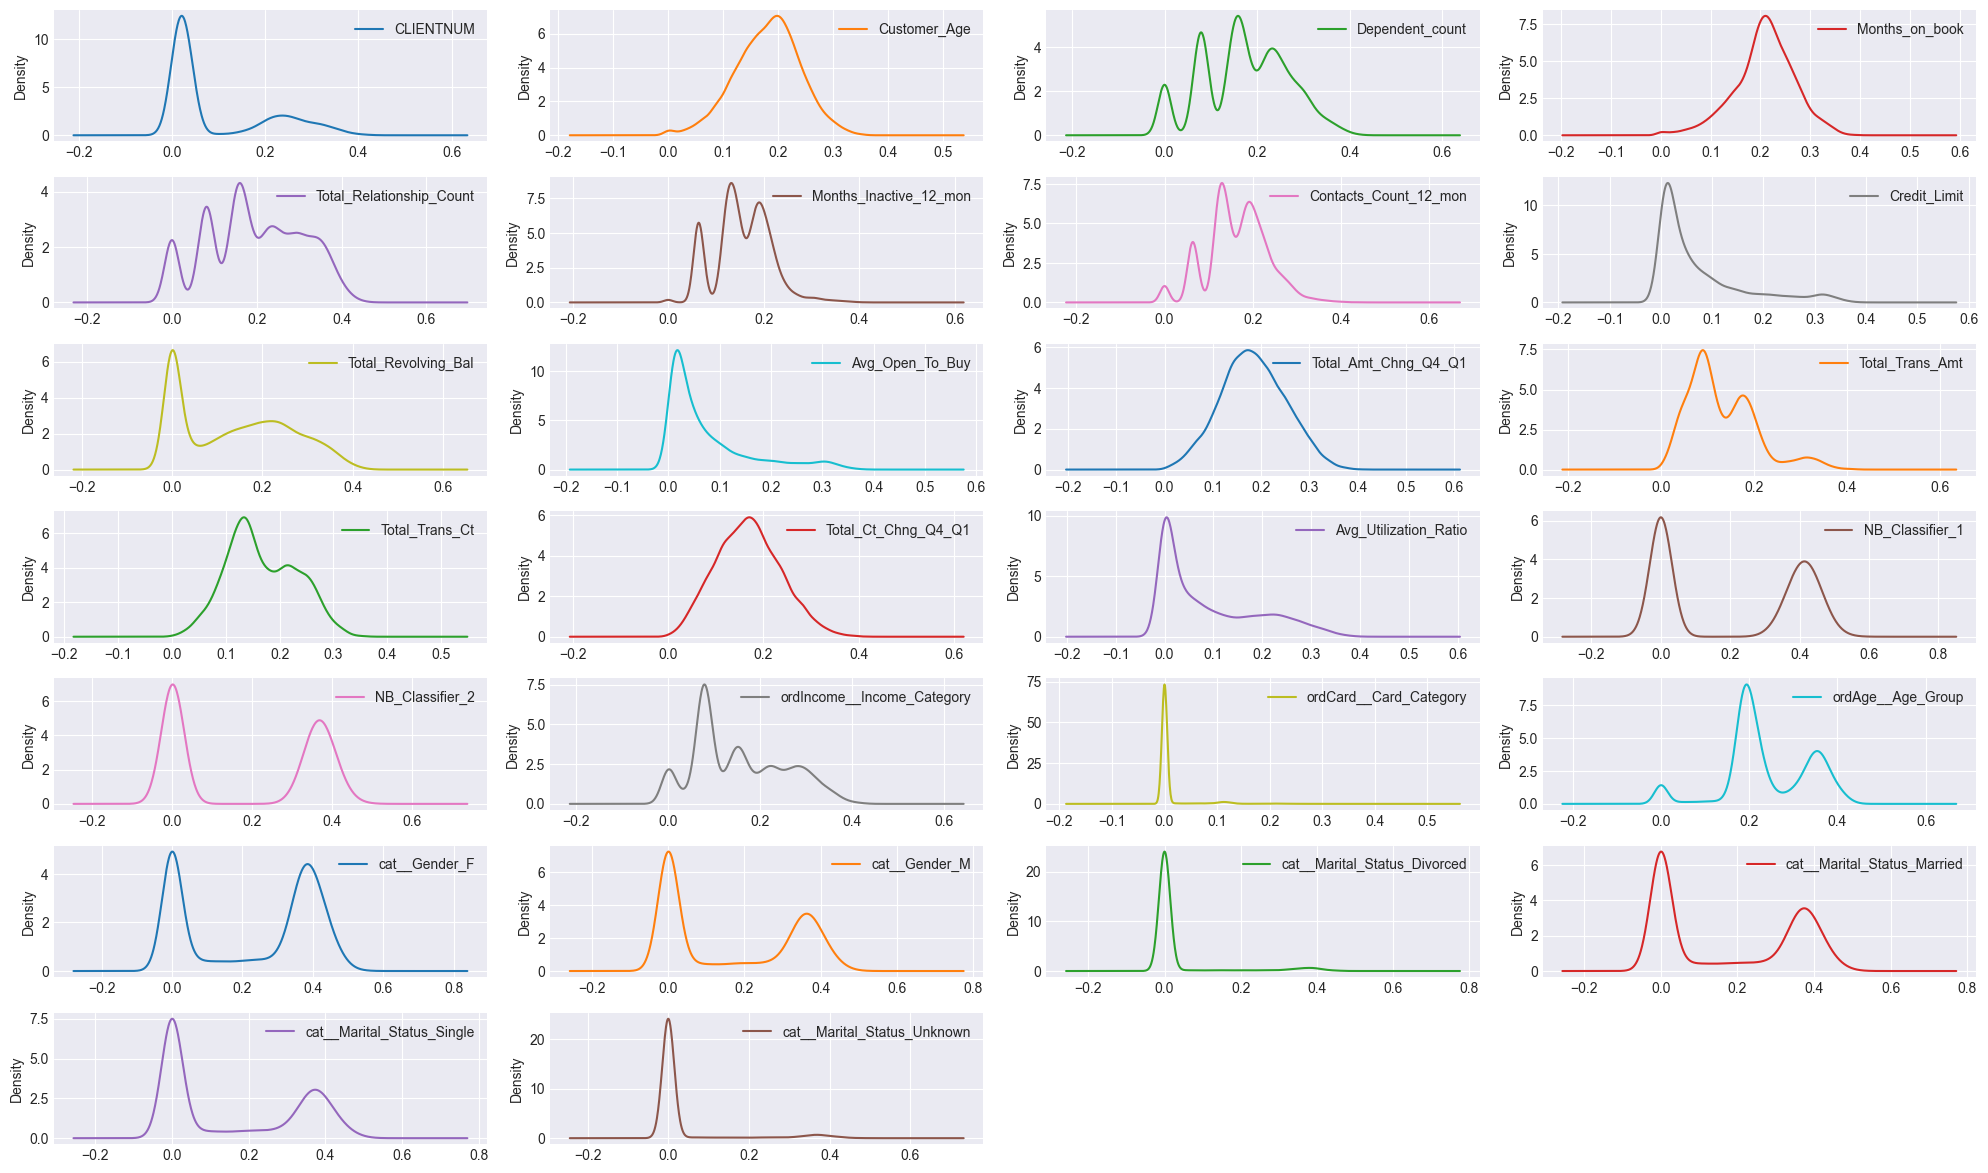

In [91]:
plt.figure(figsize=(25, 20), dpi= 100)
NR_Xtrain_df.plot(kind='density', subplots=True, layout=(12,4), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show();

## Features Selection

### Multicolinearity

In [92]:
NR_Xtrain_df['Attrition_Flag'] = y_train

<Axes: >

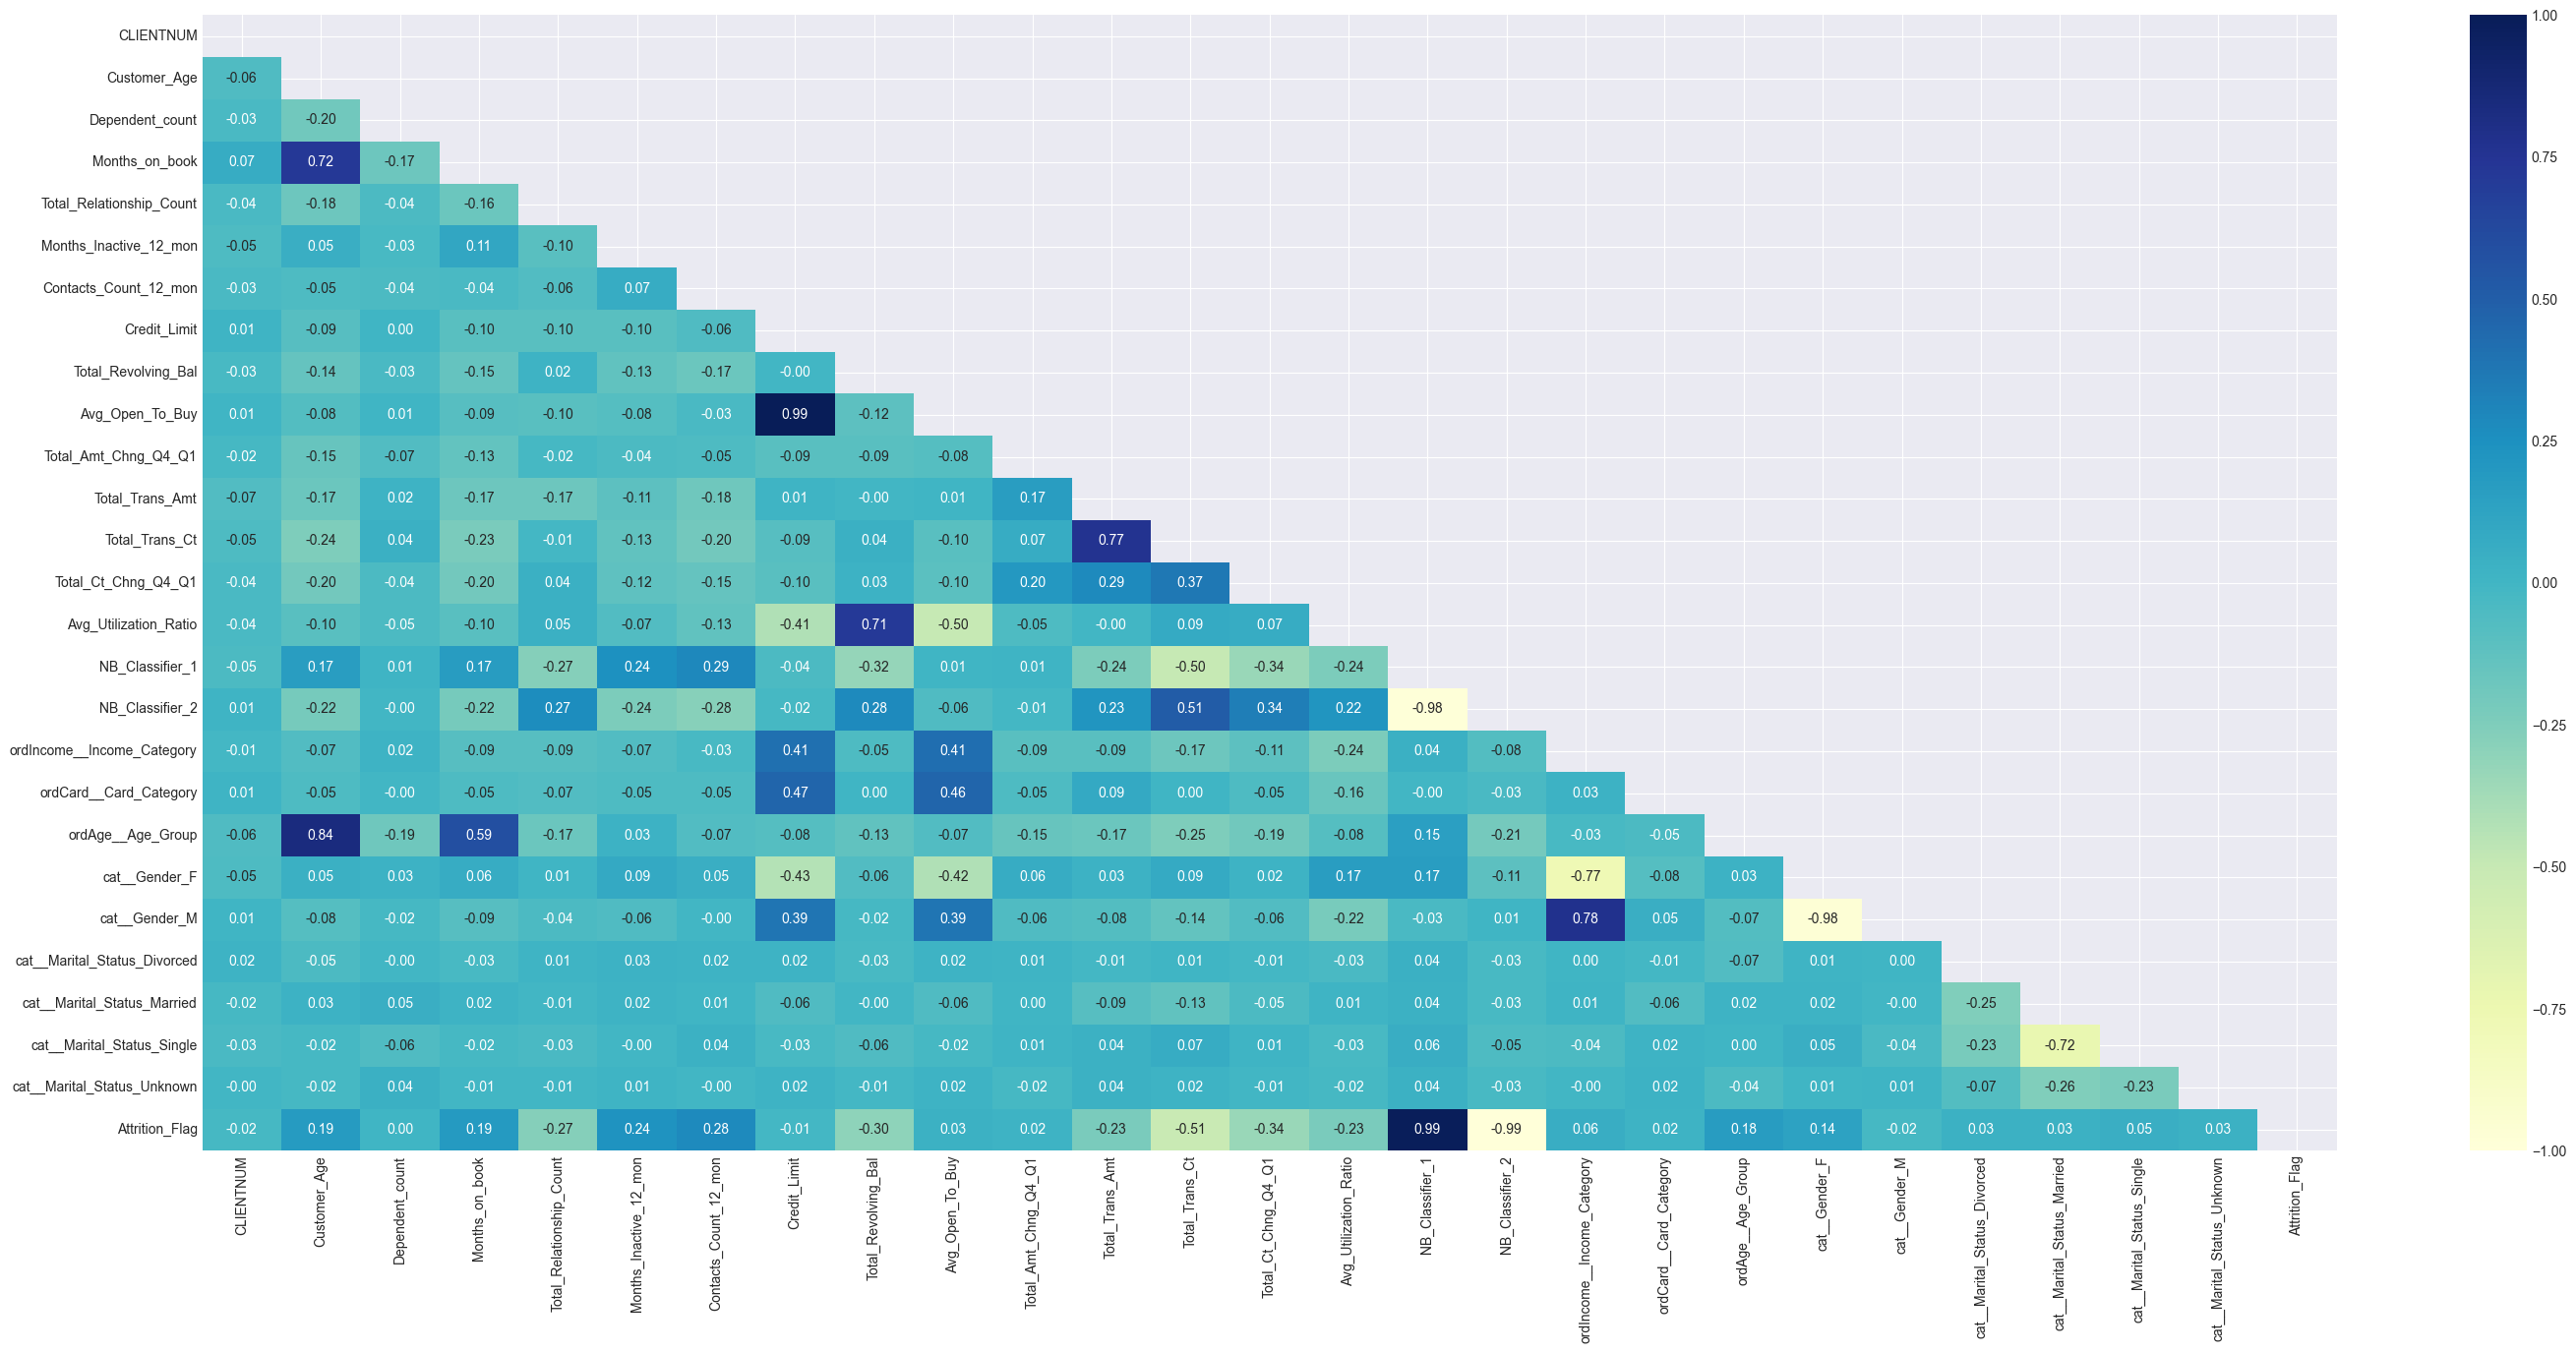

In [93]:
corr = NR_Xtrain_df.corr()
plt.figure(figsize=(35, 15))
sb.heatmap(corr, annot=True, cmap="YlGnBu", vmin=-1, vmax=1, fmt=".2f", mask=np.triu(np.ones_like(corr, dtype=bool)))

In [94]:
NR_Xtrain_df.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_Classifier_1', 'NB_Classifier_2', 'ordIncome__Income_Category',
       'ordCard__Card_Category', 'ordAge__Age_Group', 'cat__Gender_F',
       'cat__Gender_M', 'cat__Marital_Status_Divorced',
       'cat__Marital_Status_Married', 'cat__Marital_Status_Single',
       'cat__Marital_Status_Unknown', 'Attrition_Flag'],
      dtype='object')

In [95]:
columntoDrop = ['Avg_Open_To_Buy', 'ordAge__Age_Group','Total_Trans_Ct', 'NB_Classifier_2', 'NB_Classifier_1']
NR_Xtest_df.drop(columns=columntoDrop, inplace= True)
NR_Xtrain_df.drop(columns=columntoDrop, inplace= True)


<Axes: >

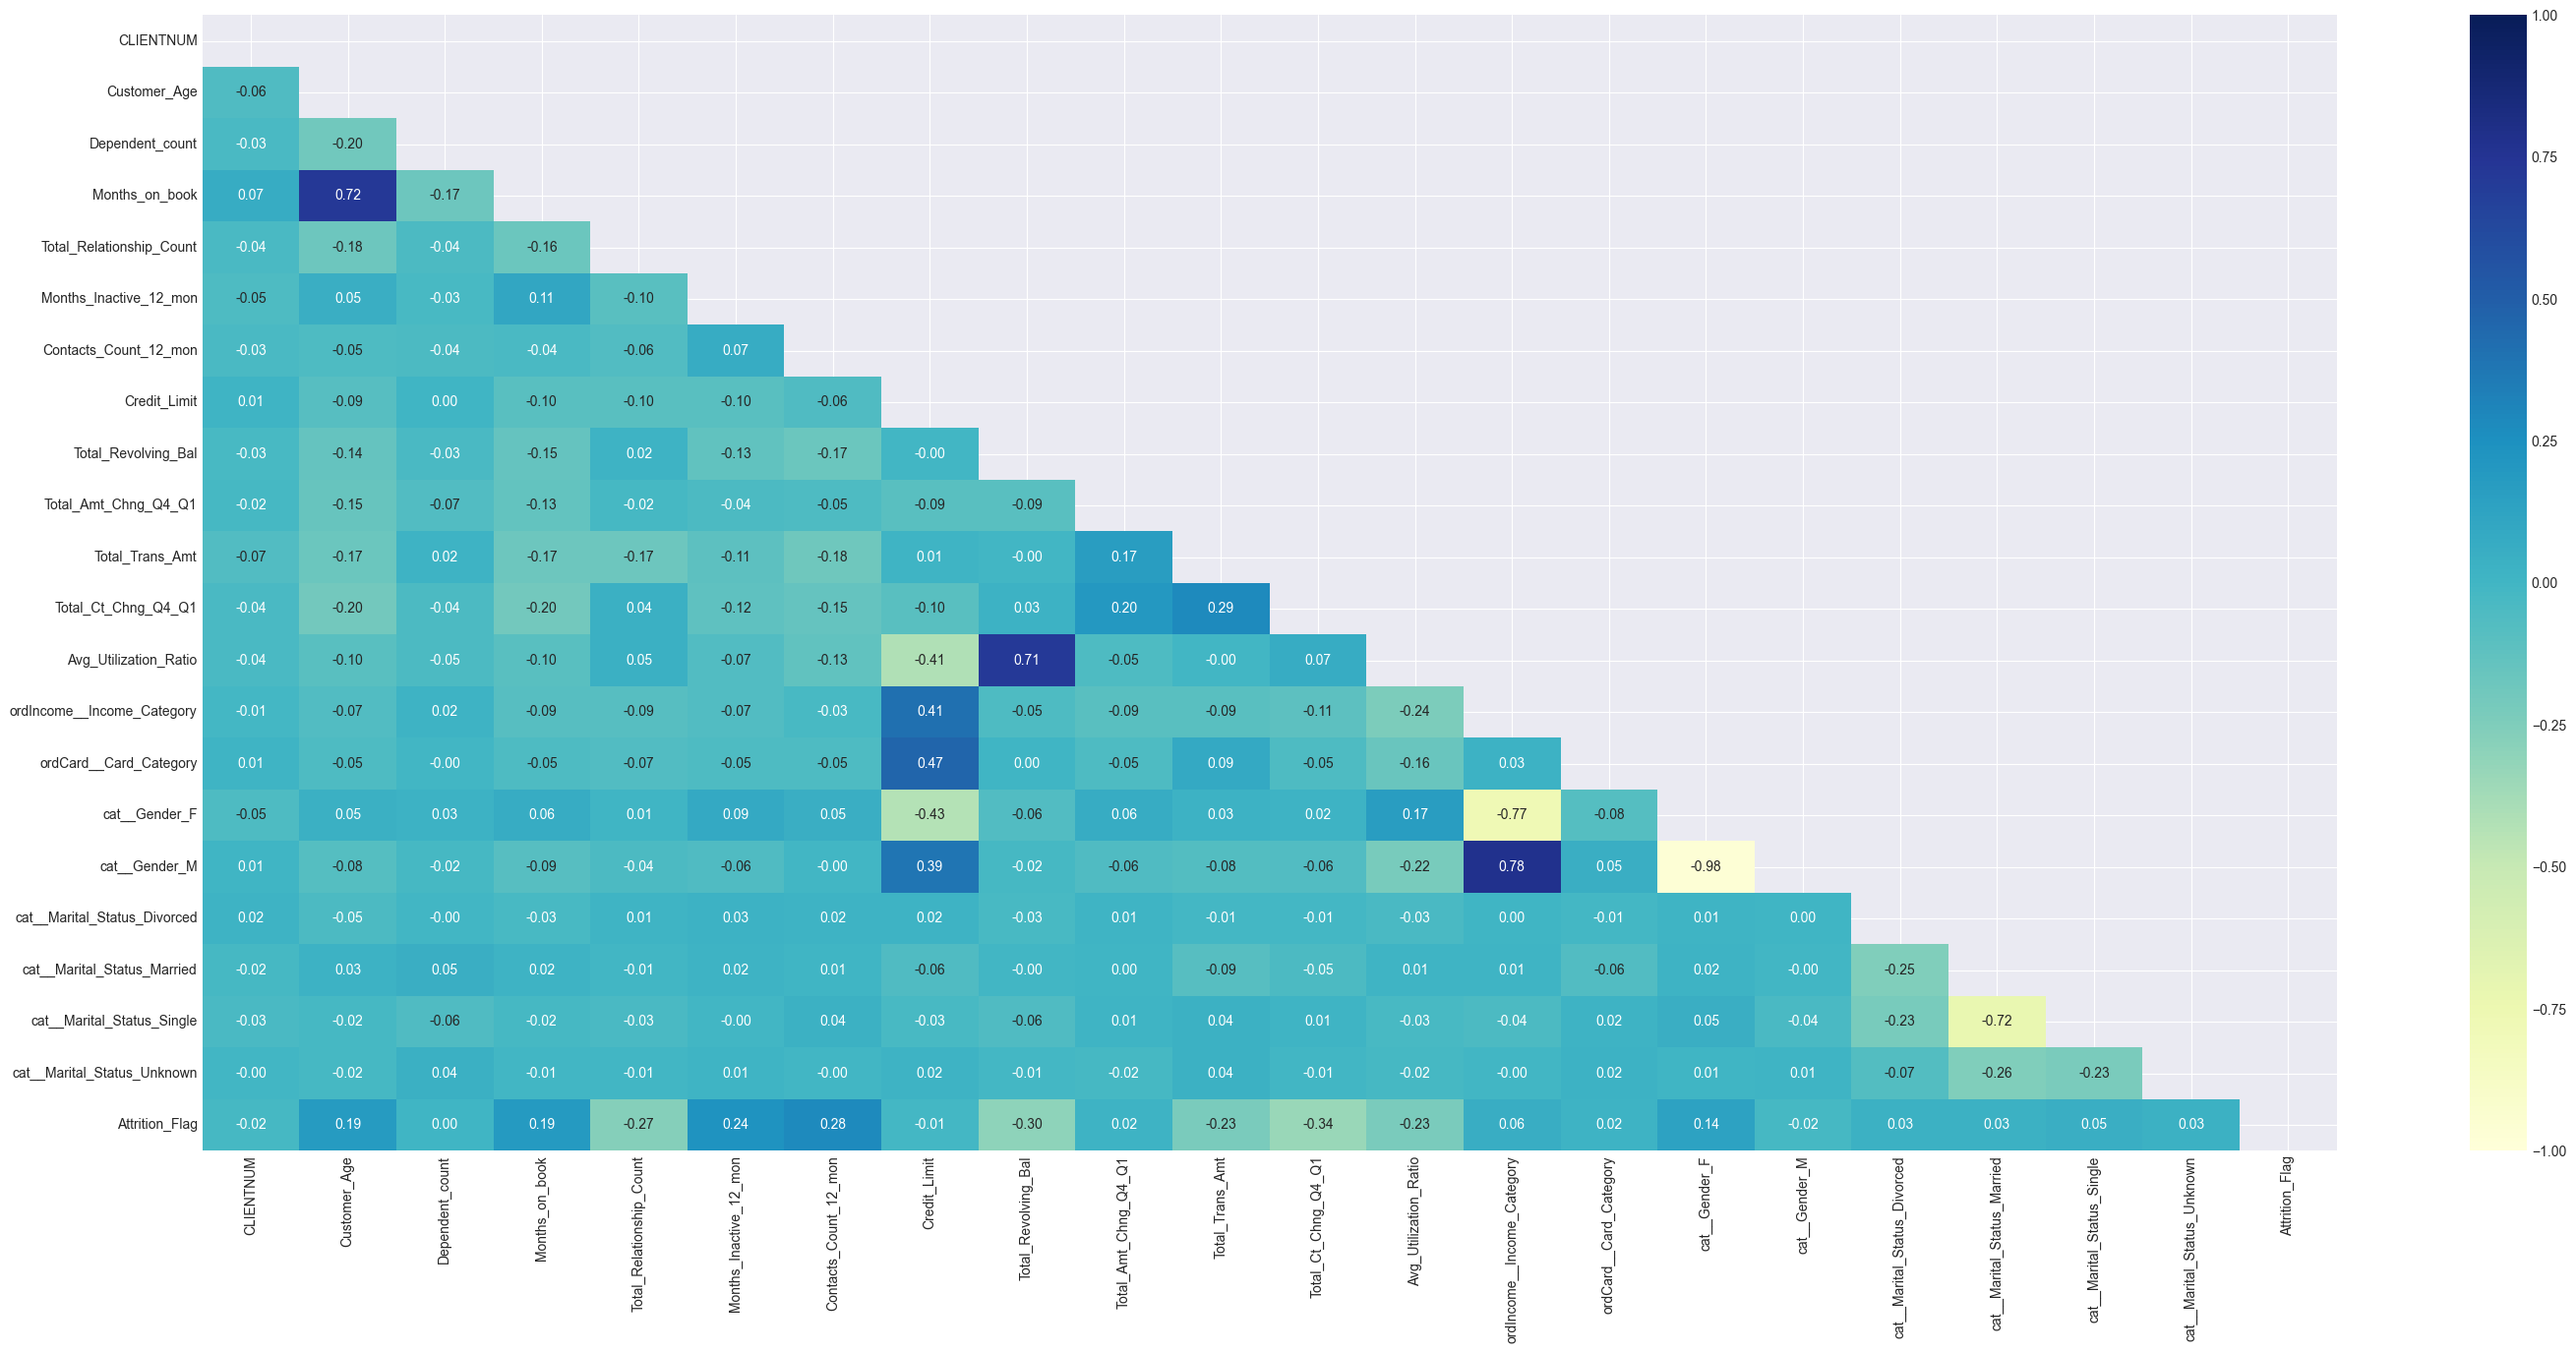

In [96]:
corr = NR_Xtrain_df.corr()
plt.figure(figsize=(35, 15))
sb.heatmap(corr, annot=True, cmap="YlGnBu", vmin=-1, vmax=1, fmt=".2f", mask=np.triu(np.ones_like(corr, dtype=bool)))

In [97]:
NR_Xtrain_df = NR_Xtrain_df.drop(columns = 'Attrition_Flag')

In [98]:
NR_Xtrain_df.shape

(11436, 21)

In [99]:
from sklearn.feature_selection import RFE
X = NR_Xtrain_df.values
Y = y_train
model = RandomForestClassifier() 
rfe = RFE(model, n_features_to_select=13)
fit = rfe.fit(X,Y) 
print(fit.support_)
print(fit.ranking_)

[False  True False False  True  True  True  True  True  True  True  True
  True  True False  True  True False False False False]
[5 1 6 2 1 1 1 1 1 1 1 1 1 1 7 1 1 9 3 4 8]


In [100]:
RFE_ = [name for name, value in zip(NR_Xtrain_df.columns, fit.ranking_) if value == 1]
len(RFE_)

13

In [101]:
RFE_

['Customer_Age',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'ordIncome__Income_Category',
 'cat__Gender_F',
 'cat__Gender_M']

In [102]:
X_train = NR_Xtrain_df[RFE_].values
X_test = NR_Xtest_df[RFE_].values

In [103]:
# Spot-Check Classifier Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('Ridge', RidgeClassifier()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.819081 (0.007482)
Ridge: 0.834734 (0.008601)
Lasso: nan (nan)
KNN: 0.912119 (0.006873)
CART: 0.906172 (0.011466)
RF: 0.949719 (0.005033)
SVM: 0.906960 (0.007268)


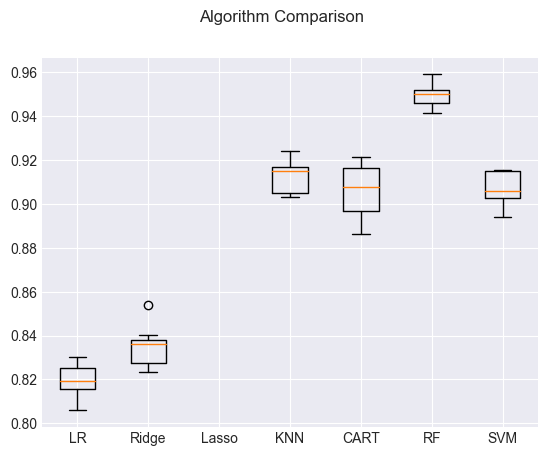

In [104]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [105]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [106]:
predictions

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [107]:
# Evaluate the model and print the results
print(classification_report(y_test, predictions))
print('F1-score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1450
           1       0.95      0.95      0.95      1410

    accuracy                           0.95      2860
   macro avg       0.95      0.95      0.95      2860
weighted avg       0.95      0.95      0.95      2860

F1-score:  0.9517045454545455


## Plotting ROC curve

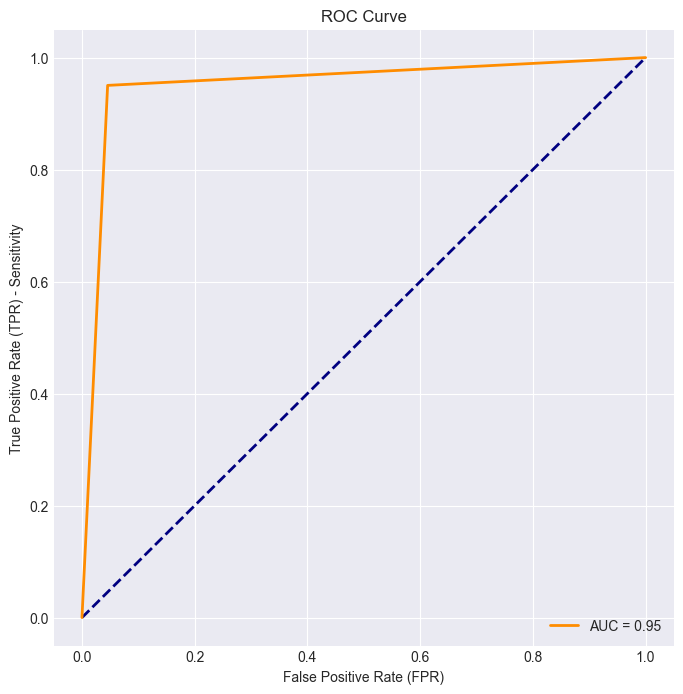

In [108]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
#plot the diagonal 50% LINE
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plot the fpr, tpr achieved by our model
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Deployment

In [114]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, mode= 'wb'))

In [110]:
loaded_model = pickle.load(open(filename, mode= 'rb'))

In [113]:
input_data = (27, 9, 0.12377182, 0.12377182, 0.21677328,0.32027249, 0.22469142, 0.194359,
              0.1780488 , 0.03922346, 0.22278927, 1, 0 )

#changing the input data to numpy array
input2np = np.asarray(input_data)
#reshape the array as we are predicing for one instance
reshape_array = input2np.reshape(1,-1)
prediction = loaded_model.predict(reshape_array)
print(prediction)

if prediction[0] == 1:
    print('The customer is on the verge of churning.')
else:
    print('The customer is not the verge of churning')

[0]
The customer is not the verge of churning
